# Global Factors Influencing Tertiary Education Enrollment
## Data cleaning and preparation

This data set contains information on world countries, values as at the year 2019. The objective is to understand factors that influence enrollment in tertiary education. We will first look at the data, clean, and prepare it for analysis.

In [1]:
import pandas as pd
import numpy as np
import phik
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('wdi.csv')
df.head()

Country Name Country Code    Group  \
0     Afghanistan          AFG  country   
1         Albania          ALB  country   
2         Algeria          DZA  country   
3  American Samoa          ASM  country   
4         Andorra          AND  country   

   Access to clean fuels and technologies for cooking (% of population)  \
0                                              32.45                      
1                                              81.60                      
2                                              99.70                      
3                                                NaN                      
4                                             100.00                      

   Access to electricity (% of population)  \
0                                     97.7   
1                                    100.0   
2                                     99.5   
3                                      NaN   
4                                    100.0   

   Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0                                             86.803               
1                                             15.013               
2                                             12.303               
3                                             30.650               
4                                              5.985               

   Age dependency ratio (% of working-age population)  \
0                                          87.649322    
1                                          47.280397    
2                                          57.053988    
3                                          53.839402    
4                                          37.958328    

   Birth rate, crude (per 1,000 people)  \
0                                36.466   
1                                10.343   
2                                23.298   
3                                17.340   
4                                 7.000   

   Compulsory education, duration (years)  \
0                                     9.0   
1                                     9.0   
2                                    10.0   
3                                     NaN   
4                                    10.0   

   Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
0                                          21.578750                                   
1                                          22.028320                                   
2                                           1.855456                                   
3                                                NaN                                   
4                                                NaN                                   

   ...  School enrollment, tertiary (% gross)  \
0  ...                               9.686420   
1  ...                              59.778500   
2  ...                              52.619942   
3  ...                                    NaN   
4  ...                                    NaN   

   Secondary education, duration (years)  \
0                                    6.0   
1                                    7.0   
2                                    7.0   
3                                    6.0   
4                                    6.0   

   Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
0                                            0.01618                                                      
1                                            5.10935                                                      
2                                            0.61271                                                      
3                                                NaN                                                      
4                                           11.05154                                                      

   U

In [4]:
df.tail()

Country Name Country Code      Group  \
261                          Sub-Saharan Africa          SSF  aggregate   
262  Sub-Saharan Africa (excluding high income)          SSA  aggregate   
263   Sub-Saharan Africa (IDA & IBRD countries)          TSS  aggregate   
264                         Upper middle income          UMC  aggregate   
265                                       World          WLD  aggregate   

     Access to clean fuels and technologies for cooking (% of population)  \
261                                          17.562676                      
262                                          17.555499                      
263                                          17.562676                      
264                                          83.210197                      
265                                          68.921601                      

     Access to electricity (% of population)  \
261                                47.132521   
262                                47.127919   
263                                47.132521   
264                                99.236195   
265                                90.194716   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
261                                         102.983198               
262                                         102.985636               
263                                         102.983198               
264                                          30.624196               
265                                          43.372848               

     Age dependency ratio (% of working-age population)  \
261                                          84.453811    
262                                          84.457302    
263                                          84.453811    
264                                          46.180170    
265                                          55.322257    

     Birth rate, crude (per 1,000 people)  \
261                             35.429624   
262                             35.431281   
263                             35.429624   
264                             12.874975   
265                             17.817433   

     Compulsory education, duration (years)  \
261                                     8.0   
262                                     8.0   
263                                     8.0   
264                                    10.0   
265                                    10.0   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
261                                          19.983968                                   
262                                          19.983968                                   
263                                          19.983968                                   
264                                           8.756605                                   
265                                           9.721909                                   

     ...  School enrollment, tertiary (% gross)  \
261  ...                               9.451630   
262  ...                               9.450980   
263  ...                               9.451630   
264  ...                              54.974369   
265  ...                              39.227379   

     Secondary education, duration (years)  \
261                                    6.0   
262                                    6.0   
263                                    6.0   
264                                    6.0   
265                                    6.0   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
261                                           4.468705                                                      
262                                           4.467824                                                      
263                                           4.46

Based on the observations at the top and bottom of the data set, we see that there are not only individual countries but also aggregates. This could be helpful, representative of countries within these regions which may not be listed. Let us see how many of each group we are working with:

In [5]:
df_ctry = df[df['Group'].str.contains('country')]
df_agg = df[df['Group'].str.contains('aggregate')]

print('Country Group:' + str(df_ctry.shape))
print('Aggregate Group:' + str(df_agg.shape))

Country Group:(217, 59)
Aggregate Group:(49, 59)


There are 59 features, describing 217 countries and 49 aggregates.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 59 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country Name                                                                                          266 non-null    object 
 1   Country Code                                                                                          266 non-null    object 
 2   Group                                                                                                 266 non-null    object 
 3   Access to clean fuels and technologies for cooking (% of population)                                  246 non-null    float64
 4   Access to electricity (% of population)                                                               26

Of the 59 features, there are 56 numeric and 3 categorical describing 266 observations. We also see that there are missing values in most columns. Looking into them will help us determine whether we can fill the missing values or delete these observations. The categorical columns Country Name, Country Code and Group are the columns with no missing values, meaning that there is no data for at least one country.

Also, it looks like our values are displayed with varying number of decimal places. We can make this neater by limiting them all to 2 decimal places:

In [7]:
# limit float to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

Looking at descriptive statistics for some of these columns, there are percentages over 100%. Typically, percentage scales up to 100%, so this appears to be an anomaly and may warrant further investigation:

In [8]:
df.describe().T

count             mean  \
Access to clean fuels and technologies for cook... 246.00            67.78   
Access to electricity (% of population)            263.00            85.69   
Adolescent fertility rate (births per 1,000 wom... 265.00            44.89   
Age dependency ratio (% of working-age population) 265.00            58.70   
Birth rate, crude (per 1,000 people)               265.00            19.26   
Compulsory education, duration (years)             261.00             9.76   
Contributing family workers, total (% of total ... 235.00             8.71   
Current health expenditure (% of GDP)              240.00             6.40   
Death rate, crude (per 1,000 people)               264.00             7.65   
Employment in agriculture (% of total employmen... 235.00            24.22   
Employment in industry (% of total employment) ... 235.00            19.84   
Employment in services (% of total employment) ... 235.00            55.94   
Employment to population ratio, 15+, total (%) ... 235.00            56.58   
Employment to population ratio, ages 15-24, tot... 235.00            35.43   
Fertility rate, total (births per woman)           258.00             2.61   
GDP (current US$)                                  262.00 2772576619699.00   
GDP growth (annual %)                              262.00             2.68   
GDP per capita (current US$)                       262.00         17180.56   
GDP per capita growth (annual %)                   260.00             1.58   
Government expenditure on education, total (% o... 245.00             4.32   
Immunization, DPT (% of children ages 12-23 mon... 241.00            87.94   
Immunization, measles (% of children ages 12-23... 241.00            87.02   
Individuals using the Internet (% of population)   259.00            59.54   
Inflation, consumer prices (annual %)              245.00           601.37   
Labor force participation rate for ages 15-24, ... 235.00            41.33   
Labor force participation rate, total (% of tot... 235.00            60.58   
Labor force, total                                 235.00     156240093.77   
Life expectancy at birth, total (years)            257.00            72.63   
Literacy rate, adult total (% of people ages 15... 240.00            85.99   
Mortality rate, infant (per 1,000 live births)     244.00            21.97   
Out-of-pocket expenditure (% of current health ... 240.00            31.93   
People using at least basic drinking water serv... 264.00            88.63   
People using at least basic sanitation services... 264.00            77.38   
Political Stability and Absence of Violence/Ter... 205.00            -0.03   
Population density (people per sq. km of land a... 264.00           374.75   
Population growth (annual %)                       265.00             1.16   
Preprimary education, duration (years)             252.00             3.99   
Primary education, duration (years)                257.00             5.78   
Probability of dying among adolescents ages 10-... 244.00             2.60   
Probability of dying among adolescents ages 15-... 244.00             4.89   
Probability of dying among children ages 5-9 ye... 244.00             3.33   
Probability of dying among youth ages 20-24 yea... 244.00             6.79   
Rule of Law: Estimate                              203.00            -0.03   
School enrollment, preprimary (% gross)            245.00            62.07   
School enrollment, primary (% gross)               245.00           101.89   
School enrollment, secondary (% gross)             240.00            81.13   
School enrollment, tertiary (% gross)              238.00            39.31   
Secondary education, duration (years)              256.00             6.36   
Total alcohol consumption per capita (liters of... 237.00             5.34   
Unemployment, total (% of total labor force) (m... 235.00             6.98   
Unemployment, youth total (% of total labor for... 235.00            15.98

The maximum value for adolescent fertility rate is 175.48. This is because, as stated in the title, it is per 1,000. This could be a bit confusing among other columns displaying percentages (per 100). We could consider altering the values to per 100, so in this case the maximum value would become 17.55. The maximum value for age dependency ratio is 105.86. This ratio measures the number of dependents younger than 15 and older than 64 (non-working age), compared with the working age of 15 to 64. Since it is possible for the number of dependents to exceed the working age population, this value is understandable. Inflation represents the annual percentage change, so it could exceed 100%, though the maximum value of 146,101.70% seems a bit extreme, particularly when compared to a minimum of -14.40%. We could come across it again when checking for outliers.

All school enrollment levels record maximum values over 100%. This ratio measures the total enrollment regardless of age, compared with the population of the age group that officially corresponds to the given level of education. This means that students above and/or below this age group (due to factors such as repetition, late entrance or early entrance) are included, pushing the value over 100%.

We also see that some columns do not contain percentages, but actual dollar values, such as GDP and GDP per capita, or actual population, such as labor force and population density. Based on how these values behave during our analysis, we can decide how to handle them.

### Checking for duplicates and missing values

In [9]:
df.duplicated().any()

False

There does not appear to be duplicate observations in this dataset.

In [10]:
df.isna().any(axis=1).sum()

88

In [11]:
df_missing = df[df.isna().any(axis=1)]
df_missing

Country Name Country Code      Group  \
3                                American Samoa          ASM    country   
4                                       Andorra          AND    country   
6                           Antigua and Barbuda          ATG    country   
9                                         Aruba          ABW    country   
21                                      Bermuda          BMU    country   
..                                          ...          ...        ...   
261                          Sub-Saharan Africa          SSF  aggregate   
262  Sub-Saharan Africa (excluding high income)          SSA  aggregate   
263   Sub-Saharan Africa (IDA & IBRD countries)          TSS  aggregate   
264                         Upper middle income          UMC  aggregate   
265                                       World          WLD  aggregate   

     Access to clean fuels and technologies for cooking (% of population)  \
3                                                  NaN                      
4                                               100.00                      
6                                               100.00                      
9                                                  NaN                      
21                                              100.00                      
..                                                 ...                      
261                                              17.56                      
262                                              17.56                      
263                                              17.56                      
264                                              83.21                      
265                                              68.92                      

     Access to electricity (% of population)  \
3                                        NaN   
4                                     100.00   
6                                     100.00   
9                                     100.00   
21                                    100.00   
..                                       ...   
261                                    47.13   
262                                    47.13   
263                                    47.13   
264                                    99.24   
265                                    90.19   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
3                                                30.65               
4                                                 5.99               
6                                                30.83               
9                                                18.91               
21                                                7.42               
..                                                 ...               
261                                             102.98               
262                                             102.99               
263                                             102.98               
264                                              30.62               
265                                              43.37               

     Age dependency ratio (% of working-age population)  \
3                                                53.84    
4                                                37.96    
6                                                40.48    
9                                                47.14    
21                                               49.94    
..                                                 ...    
261                                              84.45    
262                                              84.46    
263                                              84.45    
264                                              46.18    
265                                              55.32    

     Birth rate, crude (per 1,000 people)  \
3                                   1

Out of 266 observations, 88 are missing values. The rows with missing data contain both countries and aggregates. We will try to handle them separately:

#### Checking missing values for Aggregates

In [12]:
df_agg.isna().any(axis=1).sum()

49

There are 49 total, which tells me that at least 1 feature contains no values and may need to be removed. Given this difference between the countries and aggregates, they may need to be analyzed separately.

In [13]:
# get columns with all NaN values
# https://thispointer.com/pandas-select-columns-with-nan-values/
agg_all_NaN = df_agg.loc[:, df_agg.isnull().all()]
agg_all_NaN.T

217  218  219  220  221  \
Political Stability and Absence of Violence/Ter...  NaN  NaN  NaN  NaN  NaN   
Rule of Law: Estimate                               NaN  NaN  NaN  NaN  NaN   
Voice and Accountability: Estimate                  NaN  NaN  NaN  NaN  NaN   

                                                    222  223  224  225  226  \
Political Stability and Absence of Violence/Ter...  NaN  NaN  NaN  NaN  NaN   
Rule of Law: Estimate                               NaN  NaN  NaN  NaN  NaN   
Voice and Accountability: Estimate                  NaN  NaN  NaN  NaN  NaN   

                                                    ...  256  257  258  259  \
Political Stability and Absence of Violence/Ter...  ...  NaN  NaN  NaN  NaN   
Rule of Law: Estimate                               ...  NaN  NaN  NaN  NaN   
Voice and Accountability: Estimate                  ...  NaN  NaN  NaN  NaN   

                                                    260  261  262  263  264  \
Political Stability and Absence of Violence/Ter...  NaN  NaN  NaN  NaN  NaN   
Rule of Law: Estimate                               NaN  NaN  NaN  NaN  NaN   
Voice and Accountability: Estimate                  NaN  NaN  NaN  NaN  NaN   

                                                    265  
Political Stability and Absence of Violence/Ter...  NaN  
Rule of Law: Estimate                               NaN  
Voice and Accountability: Estimate                  NaN  

[3 rows x 49 columns]

The 3 columns with all NaN values are similar. They all fall under the topic of Public Sector: Policy and Institutions according to World Bank. Since no values are available for aggregates under this topic, we will delete these columns.

In [14]:
# drop columns with all NaN values
# https://stackoverflow.com/questions/45147100/pandas-drop-columns-with-all-nans

df_agg_copy = df_agg.copy()
df_agg_copy = df_agg_copy.dropna(axis=1, how='all')
df_agg_copy.shape

(49, 56)

In [15]:
# create new df with aggregates containing NaN values
df_missing_agg = df_agg_copy[df_agg_copy.isna().any(axis=1)]

In [16]:
# add column with number of NaN values
NaN_count = df.isna().sum(axis=1)
df_missing_agg['NaN_count'] = NaN_count
df_missing_agg[['Country Name','NaN_count']].sort_values(by=['NaN_count'], ascending=False)

Country Name  NaN_count
252                                     Not classified         56
255                        Pacific island small states          8
248  Middle East & North Africa (excluding high inc...          4
256                          Post-demographic dividend          4

This dataset was obtained from the [World Development Indicators](https://databank.worldbank.org/source/world-development-indicators#) database published by World Bank and contains data as at 2019. Before importing the csv file, additional research was conducted, including data published by CIA, ILO, USAID, WHO, and individual country articles, to try to supplement this dataset. Those missing were not published by World Bank or the other organizations, likely because they were not reported by the country or territory.

Not classified has no values, so must be dropped. For the remaining 3 aggregates, like individual countries, data was unavailable. Therefore, all rows with missing data will be dropped.

In [17]:
df_agg_copy = df_agg_copy.dropna()
df_agg_copy.shape

(45, 56)

In [18]:
df_agg_copy.isna().any(axis=1).sum()

0

#### Checking missing values for Countries

In [19]:
# get number of countries with missing values
df_ctry.isna().any(axis=1).sum()

39

Let us check the number of missing values in each row:

In [20]:
# create new df with countries containing NaN values
df_missing_ctry = df_ctry[df_ctry.isna().any(axis=1)]

In [21]:
# add column with number of NaN values
NaN_count = df.isna().sum(axis=1)
df_missing_ctry['NaN_count'] = NaN_count
df_missing_ctry[['Country Name','NaN_count']].sort_values(by=['NaN_count'], ascending=False)

Country Name  NaN_count
183   St. Martin (French part)         45
146   Northern Mariana Islands         39
3               American Samoa         38
94                 Isle of Man         38
75                   Gibraltar         35
172  Sint Maarten (Dutch part)         35
65               Faroe Islands         35
105                     Kosovo         34
77                   Greenland         32
50                     Curacao         29
27      British Virgin Islands         29
21                     Bermuda         29
9                        Aruba         29
114              Liechtenstein         28
36              Cayman Islands         27
39             Channel Islands         26
200   Turks and Caicos Islands         26
130                     Monaco         23
140              New Caledonia         21
150                      Palau         20
212      Virgin Islands (U.S.)         20
79                        Guam         20
69            French Polynesia         20
4                      Andorra         19
164                 San Marino         18
102                   Kiribati         18
128      Micronesia, Fed. Sts.         17
201                     Tuvalu         16
181        St. Kitts and Nevis         16
137                      Nauru         15
6          Antigua and Barbuda         14
158                Puerto Rico         14
78                     Grenada         14
124           Marshall Islands         14
169                 Seychelles         13
55                    Dominica         13
86        Hong Kong SAR, China         12
117           Macao SAR, China         11
103  Korea, Dem. People's Rep.          7

Quite a few observations are missing 20 or more values. We will go ahead and delete these.

In [22]:
# drop rows with 30 or more NaN values
# https://stackoverflow.com/questions/53617786/how-to-remove-rows-in-a-dataframe-with-more-than-x-number-of-null-values

df_ctry_copy = df_ctry.copy()
df_ctry_copy = df_ctry_copy.dropna(thresh=df.shape[1]-19, axis=0)
df_ctry_copy.shape

(194, 59)

Like the aggregates, since we are unable to fill the missing countries data, we will delete these rows with missing values, leaving us with 178 individual countries.

In [23]:
df_ctry_copy = df_ctry_copy.dropna()
df_ctry_copy.shape

(178, 59)

In [24]:
df_ctry_copy.isna().any(axis=1).sum()

0

In [25]:
df_agg_copy = df_agg_copy.reset_index(drop=True)
agg_df = df_agg_copy

In [26]:
df_ctry_copy = df_ctry_copy.reset_index(drop=True)
ctry_df = df_ctry_copy

At this point, we have no missing values and are working with two separate dataframes, aggregates and countries.

In [27]:
# drop country code, and group since we have separated into aggregates and countries
agg_df = agg_df.drop(columns=['Country Code','Group'])
agg_df.shape

(45, 54)

In [28]:
ctry_df = ctry_df.drop(columns=['Country Code','Group'])
ctry_df.shape

(178, 57)

### Checking for outliers
#### Outliers in aggregates

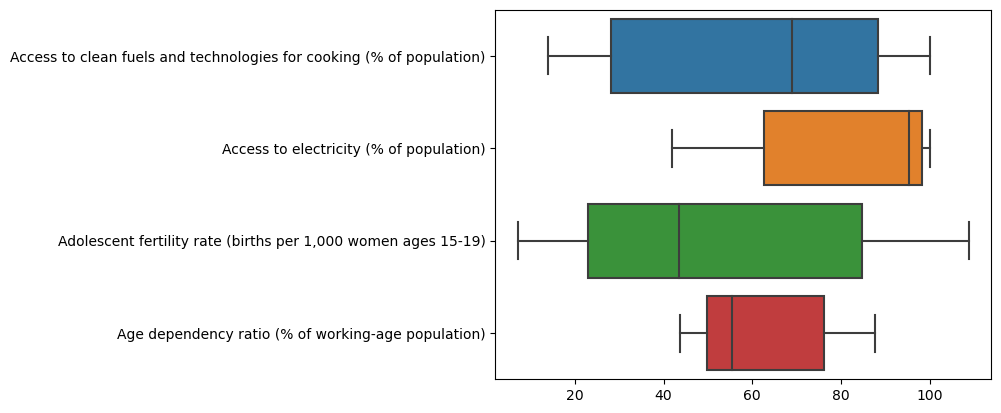

In [29]:
box_agg = sns.boxplot(data=agg_df[['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)']], orient='h')

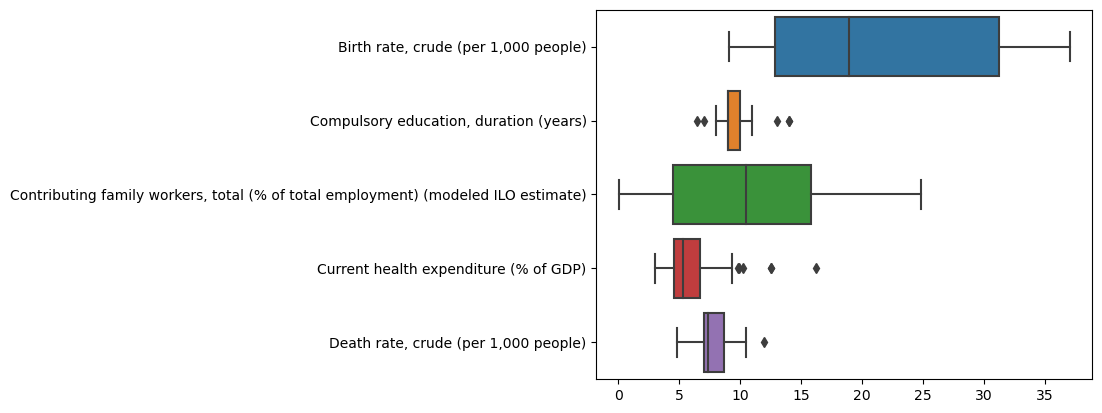

In [30]:
box_agg = sns.boxplot(data=agg_df[['Birth rate, crude (per 1,000 people)',
       'Compulsory education, duration (years)',
       'Contributing family workers, total (% of total employment) (modeled ILO estimate)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)']], orient='h')

In [31]:
agg_df['Compulsory education, duration (years)'].sort_values(ascending=False).head()

25   14.00
24   14.00
23   13.00
33   11.00
34   10.50
Name: Compulsory education, duration (years), dtype: float64

In [32]:
agg_df['Compulsory education, duration (years)'].sort_values(ascending=False).tail()

40   8.00
41   8.00
42   8.00
0    7.00
3    6.50
Name: Compulsory education, duration (years), dtype: float64

In [33]:
agg_df['Current health expenditure (% of GDP)'].sort_values(ascending=False).head()

33   16.24
16   12.56
34   12.50
9    10.24
13    9.93
Name: Current health expenditure (% of GDP), dtype: float64

In [34]:
agg_df['Death rate, crude (per 1,000 people)'].sort_values(ascending=False).head()

4    11.98
1    10.49
13   10.40
9    10.04
12    9.93
Name: Death rate, crude (per 1,000 people), dtype: float64

The boxplot shows outliers for compulsory educatio duration, current health expenditure as % of GDP and death rate. However, looking at the values in these columns, they do not seem so far off, so we will keep them.

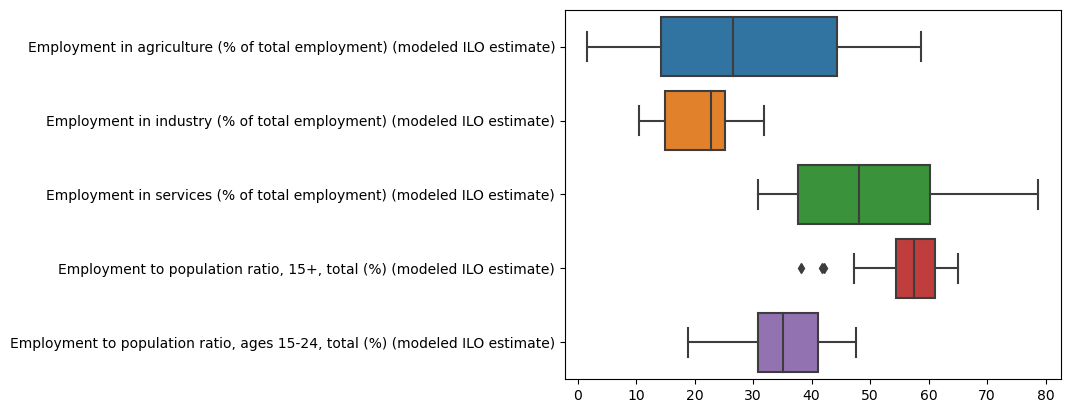

In [35]:
box_agg = sns.boxplot(data=agg_df[['Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)']], orient='h')

In [36]:
agg_df['Employment to population ratio, 15+, total (%) (modeled ILO estimate)'].sort_values(ascending=False).tail()

38   47.18
39   47.18
30   42.20
2    41.82
31   38.25
Name: Employment to population ratio, 15+, total (%) (modeled ILO estimate), dtype: float64

Again, these values are not so distant, so we will keep them.

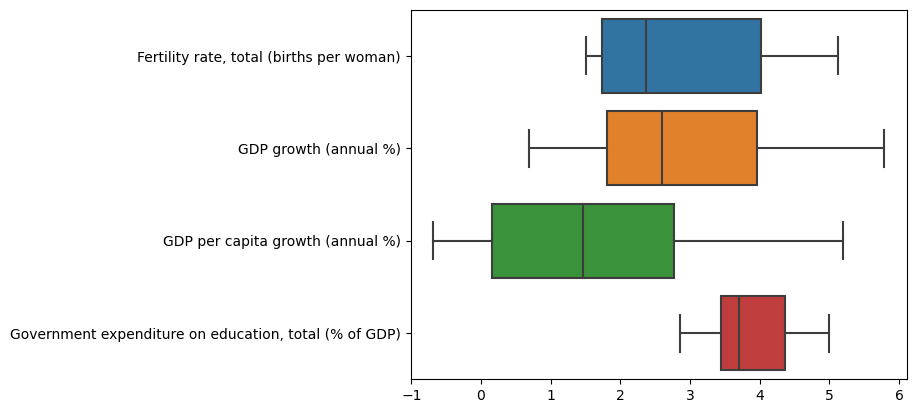

In [37]:
box_agg = sns.boxplot(data=agg_df[['Fertility rate, total (births per woman)',
       'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Government expenditure on education, total (% of GDP)']], orient='h')

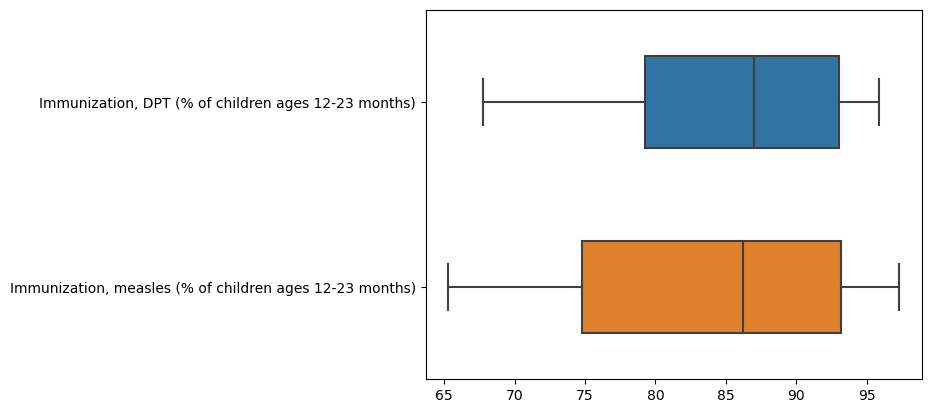

In [38]:
box_agg = sns.boxplot(data=agg_df[['Immunization, DPT (% of children ages 12-23 months)',
       'Immunization, measles (% of children ages 12-23 months)']], orient='h', width=.5)

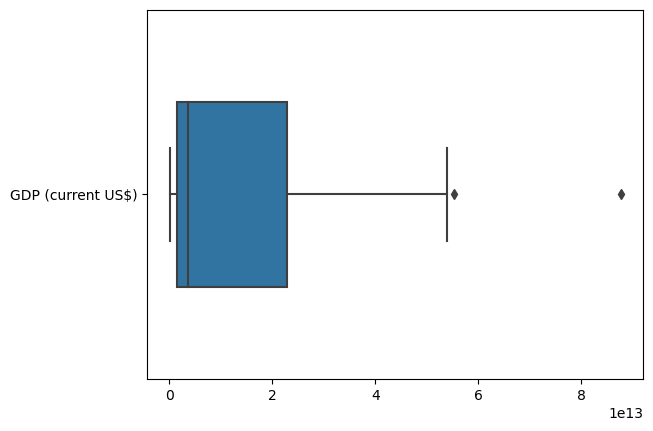

In [39]:
box_agg = sns.boxplot(data=agg_df[['GDP (current US$)']], orient='h', width=.5)

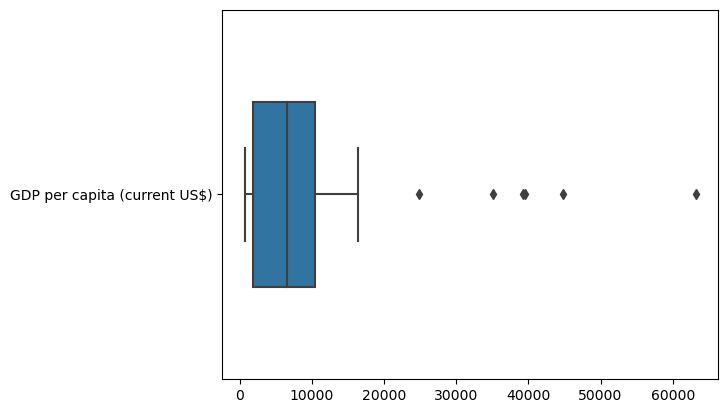

In [40]:
box_agg = sns.boxplot(data=agg_df[['GDP per capita (current US$)']], orient='h', width=.5)

In [41]:
agg_df['GDP (current US$)'].sort_values(ascending=False).head()

44   87700000000000.00
16   55300000000000.00
34   53900000000000.00
18   33600000000000.00
27   32100000000000.00
Name: GDP (current US$), dtype: float64

In [42]:
agg_df['GDP per capita (current US$)'].sort_values(ascending=False).head(10)

33   63203.37
16   44727.73
34   39531.34
9    39183.10
13   35077.73
10   24870.58
4    16349.01
35   13563.90
37   12442.12
6    11480.70
Name: GDP per capita (current US$), dtype: float64

In [43]:
# highest GDP
agg_df.iloc[[44]]

Country Name  \
44        World   

    Access to clean fuels and technologies for cooking (% of population)  \
44                                              68.92                      

    Access to electricity (% of population)  \
44                                    90.19   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
44                                              43.37               

    Age dependency ratio (% of working-age population)  \
44                                              55.32    

    Birth rate, crude (per 1,000 people)  \
44                                 17.82   

    Compulsory education, duration (years)  \
44                                   10.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
44                                               9.72                                   

    Current health expenditure (% of GDP)  \
44                                   9.83   

    Death rate, crude (per 1,000 people)  ...  \
44                                  7.47  ...   

    School enrollment, secondary (% gross)  \
44                                   76.23   

    School enrollment, tertiary (% gross)  \
44                                  39.23   

    Secondary education, duration (years)  \
44                                   6.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
44                                               5.43                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
44                                               5.54                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
44                                              15.24                                      

    Urban population (% of total population)  \
44                                     55.63   

    Urban population growth (annual %)  \
44                                1.86   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
44                                              43.36                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
44                                              53.33                                

[1 rows x 54 columns]

This outlying GDP (current US$) value makes more sense. It represents the entire world, which is an aggregate in its own right but may affect our analysis going forward. Therefore, we will drop it from the aggregate dataframe. Just in case we want to revisit these values, we will not completely discard it.

In [44]:
world_df = agg_df.iloc[[44]]

In [45]:
agg_df = agg_df.drop([44])
agg_df.shape

(44, 54)

In [46]:
agg_df = agg_df.reset_index(drop=True)

In [47]:
# highest GDP per capita
agg_df.iloc[[33]]

Country Name  \
33  North America   

    Access to clean fuels and technologies for cooking (% of population)  \
33                                             100.00                      

    Access to electricity (% of population)  \
33                                   100.00   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
33                                              15.56               

    Age dependency ratio (% of working-age population)  \
33                                              52.50    

    Birth rate, crude (per 1,000 people)  \
33                                 11.25   

    Compulsory education, duration (years)  \
33                                   11.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
33                                               0.06                                   

    Current health expenditure (% of GDP)  \
33                                  16.24   

    Death rate, crude (per 1,000 people)  ...  \
33                                  8.59  ...   

    School enrollment, secondary (% gross)  \
33                                  101.27   

    School enrollment, tertiary (% gross)  \
33                                  86.71   

    Secondary education, duration (years)  \
33                                   6.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
33                                               9.60                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
33                                               3.89                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
33                                               8.62                                      

    Urban population (% of total population)  \
33                                     82.36   

    Urban population growth (annual %)  \
33                                0.79   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
33                                               4.73                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
33                                              92.91                                

[1 rows x 54 columns]

This outlying GDP per capita (current US$) value also makes sense. Based on World Bank groupings, North America comprises Bermuda, United States and Canada, all of which contribute significantly to high GDP per capita.

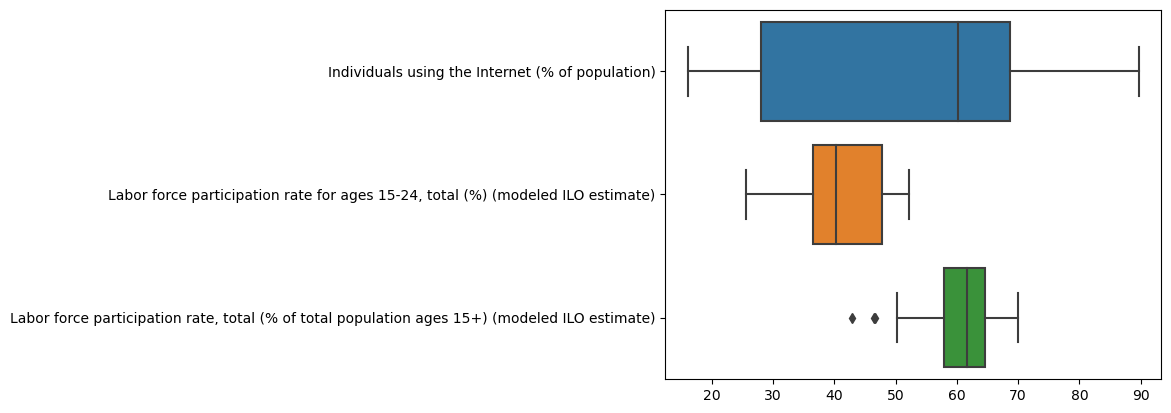

In [48]:
box_agg = sns.boxplot(data=agg_df[['Individuals using the Internet (% of population)',
       'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)']], orient='h')

In [49]:
agg_df['Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)']\
.sort_values(ascending=False).tail(10)

13   57.39
9    57.28
4    57.18
5    54.53
29   53.71
38   50.30
39   50.30
2    46.55
30   46.54
31   42.87
Name: Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate), dtype: float64

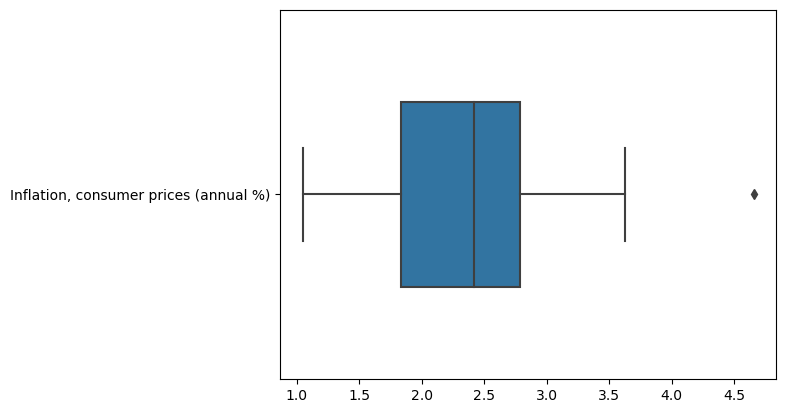

In [50]:
box_agg = sns.boxplot(data=agg_df[['Inflation, consumer prices (annual %)']], orient='h', width=.5)

In [51]:
agg_df['Inflation, consumer prices (annual %)'].sort_values(ascending=False).head()

0    4.65
39   3.63
38   3.63
29   3.39
26   3.32
Name: Inflation, consumer prices (annual %), dtype: float64

In [52]:
agg_df.iloc[[0]]

Country Name  \
0  Africa Eastern and Southern   

   Access to clean fuels and technologies for cooking (% of population)  \
0                                              19.79                      

   Access to electricity (% of population)  \
0                                    44.39   

   Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0                                              99.09               

   Age dependency ratio (% of working-age population)  \
0                                              82.69    

   Birth rate, crude (per 1,000 people)  \
0                                 34.34   

   Compulsory education, duration (years)  \
0                                    7.00   

   Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
0                                              22.66                                   

   Current health expenditure (% of GDP)  \
0                                   5.80   

   Death rate, crude (per 1,000 people)  ...  \
0                                  7.43  ...   

   School enrollment, secondary (% gross)  \
0                                   42.51   

   School enrollment, tertiary (% gross)  \
0                                   9.10   

   Secondary education, duration (years)  \
0                                   6.00   

   Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
0                                               4.61                                                      

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                               7.12                     

   Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
0                                              13.28                                      

   Urban population (% of total population)  \
0                                     36.34   

   Urban population growth (annual %)  \
0                                4.09   

   Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
0                                              70.51                             

   Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
0                                              27.02                                

[1 rows x 54 columns]

The Eastern and Southern African region, for which the highest inflation rate is reported, comprises more than two dozen countries and houses more than half of Africa's overall population.

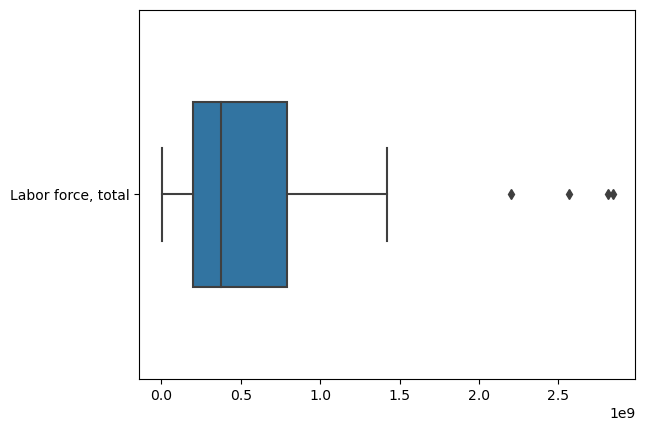

In [53]:
box_agg = sns.boxplot(data=agg_df[['Labor force, total']], orient='h', width=.5)

In [54]:
agg_df['Labor force, total'].sort_values(ascending=False).head()

18   2844569646.00
27   2812272651.00
32   2567171187.00
17   2202541646.00
43   1419618738.00
Name: Labor force, total, dtype: float64

In [55]:
agg_df.iloc[[18,27,32,17,43]]

Country Name  \
18     IDA & IBRD total   
27  Low & middle income   
32        Middle income   
17            IBRD only   
43  Upper middle income   

    Access to clean fuels and technologies for cooking (% of population)  \
18                                              63.83                      
27                                              63.02                      
32                                              68.37                      
17                                              78.02                      
43                                              83.21                      

    Access to electricity (% of population)  \
18                                    88.66   
27                                    88.32   
32                                    93.49   
17                                    97.87   
43                                    99.24   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
18                                              47.46               
27                                              47.34               
32                                              39.53               
17                                              28.28               
43                                              30.62               

    Age dependency ratio (% of working-age population)  \
18                                              55.61    
27                                              55.64    
32                                              52.33    
17                                              48.28    
43                                              46.18    

    Birth rate, crude (per 1,000 people)  \
18                                 19.20   
27                                 19.29   
32                                 17.51   
17                                 14.93   
43                                 12.87   

    Compulsory education, duration (years)  \
18                                    9.00   
27                                    9.00   
32                                   10.00   
17                                   10.00   
43                                   10.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
18                                              11.45                                   
27                                              11.74                                   
32                                              10.48                                   
17                                               9.20                                   
43                                               8.76                                   

    Current health expenditure (% of GDP)  \
18                                   5.34   
27                                   5.28   
32                                   5.28   
17                                   5.46   
43                                   5.69   

    Death rate, crude (per 1,000 people)  ...  \
18                                  7.23  ...   
27                                  7.20  ...   
32                                  7.15  ...   
17                                  7.06  ...   
43                                  7.28  ...   

    School enrollment, secondary (% gross)  \
18                                   72.73   
27                                   72.53   
32                                   77.48   
17                                   84.19   
43                                   92.90   

    School enrollment, tertiary (% gross)  \
18                                  34.24   
27                                  33.64   
32                                  36.82   
17                                  43.39   
43                                  54.97   

    Secondary education, duration (years)  \
18                                   6.00   
27                                   6.00   
32                

International Development Association (IDA) and International Bank for Reconstruction and Development (IBRD) represent a group of developing countries supported by World Bank. This group comprises 189 countries; therefore, the total labor force is not surprising. Thresholds published by World Bank created the income brackets, and the higher up the income scale, the less countries there are, so the order of these observations makes sense.

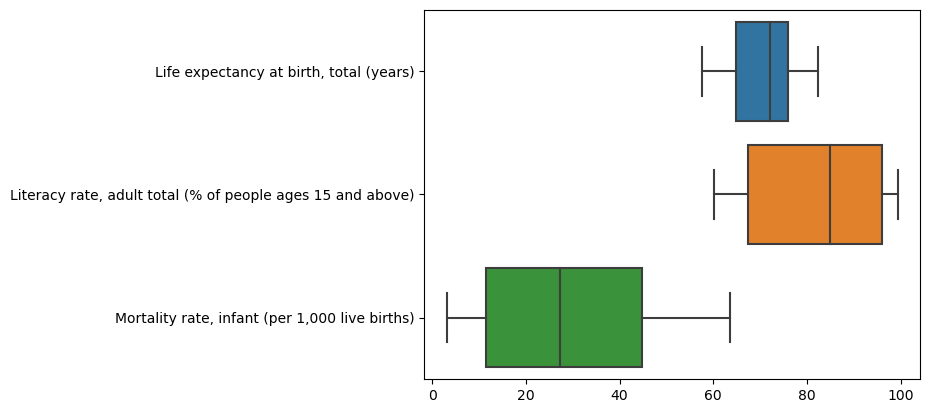

In [56]:
box_agg = sns.boxplot(data=agg_df[['Life expectancy at birth, total (years)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Mortality rate, infant (per 1,000 live births)']], orient='h')

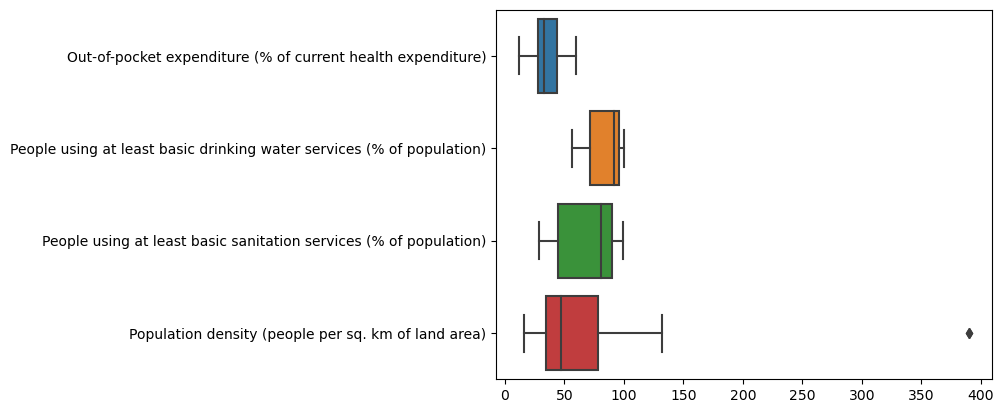

In [57]:
box_agg = sns.boxplot(data=agg_df[['Out-of-pocket expenditure (% of current health expenditure)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Population density (people per sq. km of land area)']], orient='h')

This outlier for population density looks way off simply by looking at this boxplot.

In [58]:
agg_df['Population density (people per sq. km of land area)'].sort_values(ascending=False).head()

39   390.26
38   390.26
7    131.76
8    131.14
19   130.15
Name: Population density (people per sq. km of land area), dtype: float64

In [59]:
agg_df.iloc[[39,38]]

Country Name  \
39  South Asia (IDA & IBRD)   
38               South Asia   

    Access to clean fuels and technologies for cooking (% of population)  \
39                                              56.41                      
38                                              56.41                      

    Access to electricity (% of population)  \
39                                    95.31   
38                                    95.31   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
39                                              29.69               
38                                              29.69               

    Age dependency ratio (% of working-age population)  \
39                                              52.98    
38                                              52.98    

    Birth rate, crude (per 1,000 people)  \
39                                 18.93   
38                                 18.93   

    Compulsory education, duration (years)  \
39                                    9.00   
38                                    9.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
39                                              12.84                                   
38                                              12.84                                   

    Current health expenditure (% of GDP)  \
39                                   3.00   
38                                   3.00   

    Death rate, crude (per 1,000 people)  ...  \
39                                  6.60  ...   
38                                  6.60  ...   

    School enrollment, secondary (% gross)  \
39                                   69.92   
38                                   69.92   

    School enrollment, tertiary (% gross)  \
39                                  25.30   
38                                  25.30   

    Secondary education, duration (years)  \
39                                   7.00   
38                                   7.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
39                                               3.82                                                      
38                                               3.82                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
39                                               6.20                     
38                                               6.20                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
39                                              19.97                                      
38                                              19.97                                      

    Urban population (% of total population)  \
39                                     34.44   
38                                     34.44   

    Urban population growth (annual %)  \
39                                2.45   
38                                2.45   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
39                                              68.85                             
38                                              68.85                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
39                                              28.65                                
38                                              28.65                                

[2 rows x 54 columns]

South Asia consists of some of the most densely populated countries in the world, such as Bangladesh, India and Nepal, which must have contributed to such a high population density.

These rows appear to have duplicate values that were not picked up earlier because the Country Names (and possibly a few other values) are different. Notably, all countries in South Asia are members of IDA and IBRD, which would explain why the values are duplicated; therefore, we may need to drop one of the rows. First, let us check that all other columns are duplicates.

In [60]:
south_asia = agg_df.drop(columns=['Country Name']).iloc[[39,38]]
south_asia.duplicated()

39    False
38    False
dtype: bool

Not all other columns are duplicates.

In [61]:
# compares row 38 values to previous row, 39
sa_duplicates = south_asia.diff()
sa_duplicates

Access to clean fuels and technologies for cooking (% of population)  \
39                                                NaN                      
38                                               0.00                      

    Access to electricity (% of population)  \
39                                      NaN   
38                                     0.00   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
39                                                NaN               
38                                               0.00               

    Age dependency ratio (% of working-age population)  \
39                                                NaN    
38                                               0.00    

    Birth rate, crude (per 1,000 people)  \
39                                   NaN   
38                                  0.00   

    Compulsory education, duration (years)  \
39                                     NaN   
38                                    0.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
39                                                NaN                                   
38                                               0.00                                   

    Current health expenditure (% of GDP)  \
39                                    NaN   
38                                   0.00   

    Death rate, crude (per 1,000 people)  \
39                                   NaN   
38                                  0.00   

    Employment in agriculture (% of total employment) (modeled ILO estimate)  \
39                                                NaN                          
38                                               0.00                          

    ...  School enrollment, secondary (% gross)  \
39  ...                                     NaN   
38  ...                                    0.00   

    School enrollment, tertiary (% gross)  \
39                                    NaN   
38                                   0.00   

    Secondary education, duration (years)  \
39                                    NaN   
38                                   0.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
39                                                NaN                                                      
38                                               0.00                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
39                                                NaN                     
38                                               0.00                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
39                                                NaN                                      
38                                               0.00                                      

    Urban population (% of total population)  \
39                                       NaN   
38                                      0.00   

    Urban population growth (annual %)  \
39                                 NaN   
38                                0.00   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
39                                                NaN                             
38                                               0.00                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
39                                                NaN                                
38                                               0.00                                

[2 rows x 53 columns]

In [62]:
# get subset of South Asia dataframe with values not equal to 0 in the second row
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
sa_different = sa_duplicates.iloc[1, :] != 0
sa_different.loc[sa_different == True]

Mortality rate, infant (per 1,000 live births)                         True
Probability of dying among adolescents ages 10-14 years (per 1,000)    True
Probability of dying among adolescents ages 15-19 years (per 1,000)    True
Probability of dying among children ages 5-9 years (per 1,000)         True
Probability of dying among youth ages 20-24 years (per 1,000)          True
Name: 38, dtype: bool

In [63]:
south_asia[['Mortality rate, infant (per 1,000 live births)',\
           'Probability of dying among adolescents ages 10-14 years (per 1,000)',\
           'Probability of dying among adolescents ages 15-19 years (per 1,000)',\
           'Probability of dying among children ages 5-9 years (per 1,000)',\
           'Probability of dying among youth ages 20-24 years (per 1,000)']].T

39    38
Mortality rate, infant (per 1,000 live births)     33.43 33.40
Probability of dying among adolescents ages 10-...  2.70  2.70
Probability of dying among adolescents ages 15-...  4.48  4.50
Probability of dying among children ages 5-9 ye...  2.55  2.50
Probability of dying among youth ages 20-24 yea...  5.69  5.70

The differences between these figures are minute, which convinces me that rows 39 and 38 are in fact duplicates, and we can drop one.

In [64]:
agg_df = agg_df.drop([39])
agg_df.shape

(43, 54)

In [65]:
agg_df = agg_df.reset_index(drop=True)

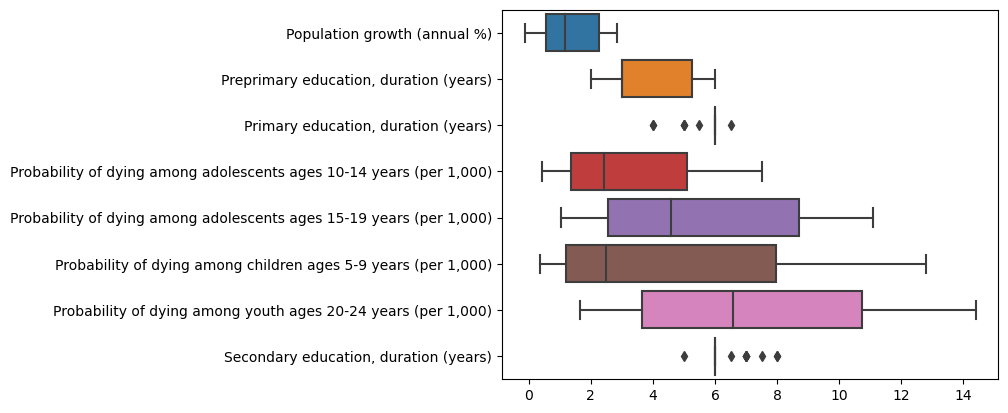

In [66]:
box_agg = sns.boxplot(data=agg_df[['Population growth (annual %)','Preprimary education, duration (years)',
       'Primary education, duration (years)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Secondary education, duration (years)']], orient='h')

In [67]:
agg_df['Primary education, duration (years)'].sort_values(ascending=False).head()

3    6.50
0    6.00
32   6.00
24   6.00
25   6.00
Name: Primary education, duration (years), dtype: float64

In [68]:
agg_df['Primary education, duration (years)'].sort_values(ascending=False).tail(6)

22   5.50
38   5.00
10   5.00
4    5.00
12   4.00
11   4.00
Name: Primary education, duration (years), dtype: float64

In [69]:
agg_df['Secondary education, duration (years)'].sort_values(ascending=False).head(10)

12   8.00
4    8.00
11   7.50
1    7.00
38   7.00
29   7.00
10   7.00
13   7.00
22   6.50
33   6.00
Name: Secondary education, duration (years), dtype: float64

In [70]:
agg_df['Secondary education, duration (years)'].sort_values(ascending=False).tail()

18   6.00
19   6.00
20   6.00
42   6.00
3    5.00
Name: Secondary education, duration (years), dtype: float64

Some aggregates share the number of years for primary and secondary education, and the shortest and longest durations are not far off.

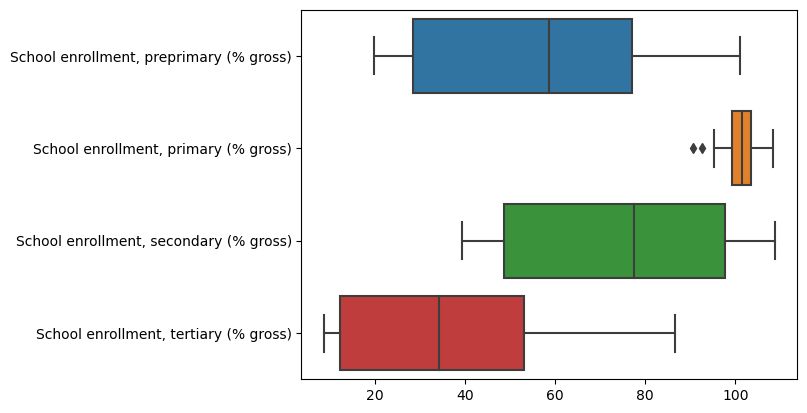

In [71]:
box_agg = sns.boxplot(data=agg_df[['School enrollment, preprimary (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, secondary (% gross)',
       'School enrollment, tertiary (% gross)']], orient='h')

In [72]:
agg_df['School enrollment, primary (% gross)'].sort_values(ascending=False).tail()

14   96.40
2    96.08
4    95.29
19   92.72
1    90.52
Name: School enrollment, primary (% gross), dtype: float64

Again, these values are not so far apart.

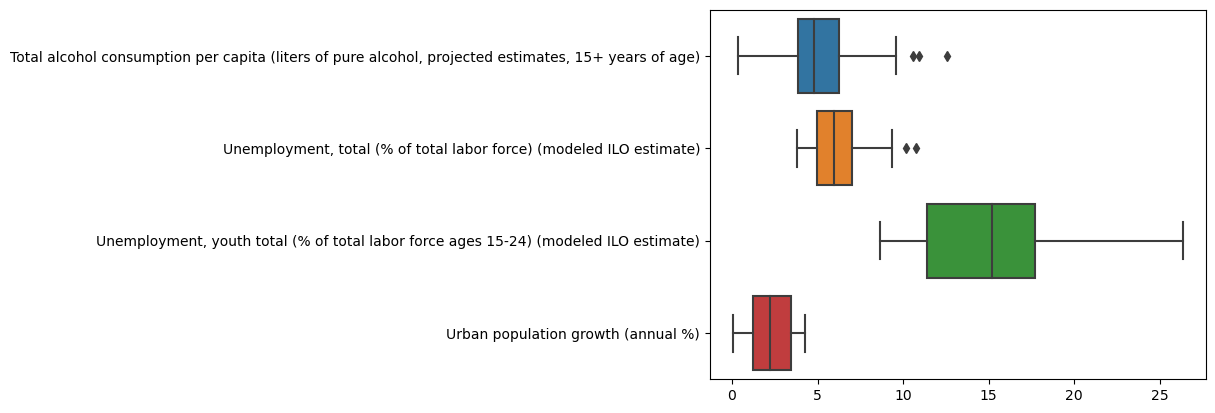

In [73]:
box_agg = sns.boxplot(data=agg_df[[
    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
       'Urban population growth (annual %)']], orient='h')

In [74]:
agg_df['Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)']\
.sort_values(ascending=False).head()

4    12.55
13   10.95
9    10.56
33    9.60
10    9.24
Name: Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age), dtype: float64

In [75]:
agg_df.iloc[[4,13,9]]

Country Name  \
4   Central Europe and the Baltics   
13                  European Union   
9                        Euro area   

    Access to clean fuels and technologies for cooking (% of population)  \
4                                              100.00                      
13                                             100.00                      
9                                              100.00                      

    Access to electricity (% of population)  \
4                                     99.95   
13                                    99.99   
9                                    100.00   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
4                                               19.39               
13                                               9.29               
9                                                7.06               

    Age dependency ratio (% of working-age population)  \
4                                               51.91    
13                                              55.29    
9                                               56.00    

    Birth rate, crude (per 1,000 people)  \
4                                   9.91   
13                                  9.33   
9                                   9.11   

    Compulsory education, duration (years)  \
4                                    10.00   
13                                   10.00   
9                                    10.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
4                                                2.38                                   
13                                               1.00                                   
9                                                0.58                                   

    Current health expenditure (% of GDP)  \
4                                    6.67   
13                                   9.93   
9                                   10.24   

    Death rate, crude (per 1,000 people)  ...  \
4                                  11.98  ...   
13                                 10.40  ...   
9                                  10.04  ...   

    School enrollment, secondary (% gross)  \
4                                   100.84   
13                                  108.79   
9                                   107.47   

    School enrollment, tertiary (% gross)  \
4                                   63.35   
13                                  73.15   
9                                   77.02   

    Secondary education, duration (years)  \
4                                    8.00   
13                                   7.00   
9                                    6.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
4                                               12.55                                                      
13                                              10.95                                                      
9                                               10.56                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
4                                                3.78                     
13                                               6.68                     
9                                                7.52                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
4                                               11.64                                      
13                                              16.89                                      
9                                               18.28                                      

    Urban population (% of total population)  \
4                                      62.44   
13                    

Interestingly, the highest values total alcohol consumption per capita are held by "Euro" aggregates. Although they do not appear to be duplicates, it should be noted that the Central Europe and the Baltics and Euro area countries all form part of the European Union (EU). In many cases, the EU values fall between the two others, making them seem redundant. Nonetheless, we will keep these observations for now and observe how they affect our analysis.

In [76]:
agg_df['Unemployment, total (% of total labor force) (modeled ILO estimate)'].sort_values(ascending=False).head()

31   10.78
2    10.17
30    9.33
35    9.06
37    8.33
Name: Unemployment, total (% of total labor force) (modeled ILO estimate), dtype: float64

In [77]:
agg_df.iloc[[31,2,30]]

Country Name  \
31  Middle East & North Africa (IDA & IBRD countries)   
2                                          Arab World   
30                         Middle East & North Africa   

    Access to clean fuels and technologies for cooking (% of population)  \
31                                              95.37                      
2                                               87.80                      
30                                              96.06                      

    Access to electricity (% of population)  \
31                                    96.61   
2                                     90.35   
30                                    97.13   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
31                                              39.95               
2                                               47.50               
30                                              36.70               

    Age dependency ratio (% of working-age population)  \
31                                              58.55    
2                                               62.14    
30                                              55.86    

    Birth rate, crude (per 1,000 people)  \
31                                 21.71   
2                                  24.60   
30                                 21.06   

    Compulsory education, duration (years)  \
31                                    9.00   
2                                     9.00   
30                                    9.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
31                                               5.78                                   
2                                                5.34                                   
30                                               4.44                                   

    Current health expenditure (% of GDP)  \
31                                   5.45   
2                                    4.83   
30                                   5.41   

    Death rate, crude (per 1,000 people)  ...  \
31                                  5.17  ...   
2                                   5.20  ...   
30                                  4.79  ...   

    School enrollment, secondary (% gross)  \
31                                   78.42   
2                                    72.44   
30                                   81.95   

    School enrollment, tertiary (% gross)  \
31                                  38.55   
2                                   33.31   
30                                  41.37   

    Secondary education, duration (years)  \
31                                   6.00   
2                                    6.00   
30                                   6.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
31                                               0.45                                                      
2                                                0.36                                                      
30                                               0.53                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
31                                              10.78                     
2                                               10.17                     
30                                               9.33                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
31                                              25.95                                      
2                                               26.37                                      
30                                              25.02                                      

    Urban population (% of total population)  \
31           

The observations including Middle East & North Africa (MENA) are similar with the exception that West Bank and Gaza are not among IDA and IBRD countries. Additionally, most MENA countries (exceptions Iran, Israel, Malta) form part of the Arab World.

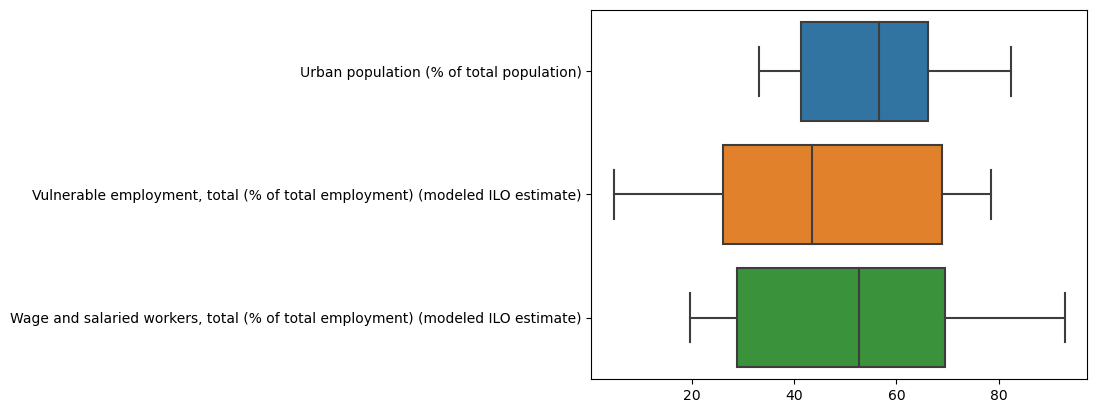

In [78]:
box_agg = sns.boxplot(data=agg_df[['Urban population (% of total population)',
       'Vulnerable employment, total (% of total employment) (modeled ILO estimate)',
       'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)']], orient='h')

Before moving on, let us check once again for any duplicates like we encountered earlier. In the South Asia example, country names were different, but the following columns contained duplicates, so we will use one of them.

In [79]:
agg_df['Unemployment, total (% of total labor force) (modeled ILO estimate)'].duplicated().sum()

2

We have 2 duplicates of a value for unemployment. We need to be sure these are duplicates and not in fact different regions reporting the same unemployed percentage of their labor force.

In [80]:
# check rows with duplicate values in one or more columns
# https://stackoverflow.com/questions/74007745/how-to-find-columns-in-duplicated-rows-where-are-different-values-in-dataframe-i
agg_2 = agg_df[agg_df.groupby('Unemployment, total (% of total labor force) (modeled ILO estimate)')\
               ['Unemployment, total (% of total labor force) (modeled ILO estimate)'].transform('size')>1]
agg_2

Country Name  \
39                          Sub-Saharan Africa   
40  Sub-Saharan Africa (excluding high income)   
41   Sub-Saharan Africa (IDA & IBRD countries)   

    Access to clean fuels and technologies for cooking (% of population)  \
39                                              17.56                      
40                                              17.56                      
41                                              17.56                      

    Access to electricity (% of population)  \
39                                    47.13   
40                                    47.13   
41                                    47.13   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
39                                             102.98               
40                                             102.99               
41                                             102.98               

    Age dependency ratio (% of working-age population)  \
39                                              84.45    
40                                              84.46    
41                                              84.45    

    Birth rate, crude (per 1,000 people)  \
39                                 35.43   
40                                 35.43   
41                                 35.43   

    Compulsory education, duration (years)  \
39                                    8.00   
40                                    8.00   
41                                    8.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
39                                              19.98                                   
40                                              19.98                                   
41                                              19.98                                   

    Current health expenditure (% of GDP)  \
39                                   4.69   
40                                   4.69   
41                                   4.69   

    Death rate, crude (per 1,000 people)  ...  \
39                                  8.67  ...   
40                                  8.67  ...   
41                                  8.67  ...   

    School enrollment, secondary (% gross)  \
39                                   43.73   
40                                   43.73   
41                                   43.73   

    School enrollment, tertiary (% gross)  \
39                                   9.45   
40                                   9.45   
41                                   9.45   

    Secondary education, duration (years)  \
39                                   6.00   
40                                   6.00   
41                                   6.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
39                                               4.47                                                      
40                                               4.47                                                      
41                                               4.47                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
39                                               6.07                     
40                                               6.07                     
41                                               6.07                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
39                                              11.57                                      
40                                              11.57                                      
41                                              11.57                                      

    Urban population (% of total population)  \
39                                

All three of these observations contain Sub-Saharan Africa in the name, and have many duplicate values indicating they represent the same countries. Therefore, we will drop two of them. This further reduces the size of our aggregate dataset but avoids redundancy.

In [81]:
agg_df = agg_df.drop([40,41])
agg_df.shape

(41, 54)

In [82]:
agg_df = agg_df.reset_index(drop=True)

#### Outliers in countries

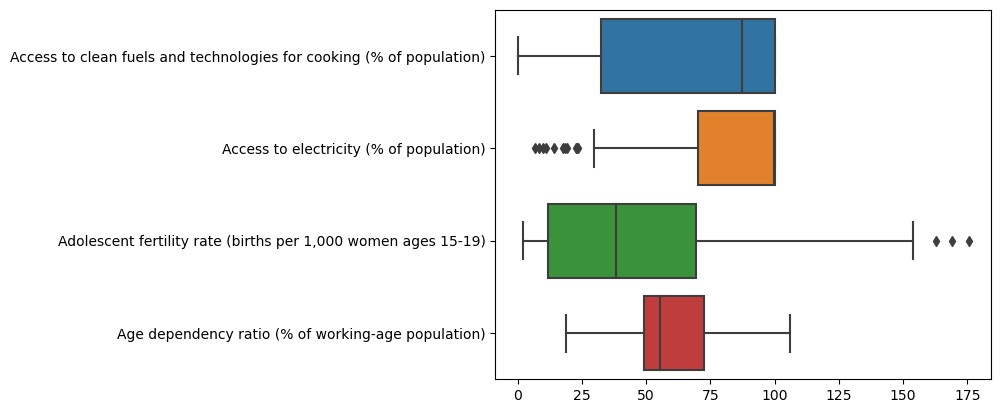

In [83]:
box_ctry = sns.boxplot(data=ctry_df[['Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)']], orient='h')

In [84]:
ctry_df['Access to electricity (% of population)'].sort_values(ascending=False).tail(15)

155   37.70
95    31.04
66    30.93
108   29.69
122   23.60
91    23.10
137   22.70
36    19.10
115   18.46
24    17.60
30    14.30
96    11.20
25     9.84
31     8.40
144    6.77
Name: Access to electricity (% of population), dtype: float64

In [85]:
ctry_df.iloc[[155,108,144]]

Country Name  \
155     Tanzania   
108   Mozambique   
144  South Sudan   

     Access to clean fuels and technologies for cooking (% of population)  \
155                                               5.60                      
108                                               4.90                      
144                                               0.00                      

     Access to electricity (% of population)  \
155                                    37.70   
108                                    29.69   
144                                     6.77   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
155                                             126.38               
108                                             168.85               
144                                              98.79               

     Age dependency ratio (% of working-age population)  \
155                                              89.63    
108                                              87.47    
144                                              96.54    

     Birth rate, crude (per 1,000 people)  \
155                                 37.11   
108                                 37.34   
144                                 29.06   

     Compulsory education, duration (years)  \
155                                    7.00   
108                                    7.00   
144                                    8.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
155                                              31.79                                   
108                                              18.93                                   
144                                              42.75                                   

     Current health expenditure (% of GDP)  \
155                                   3.87   
108                                   7.95   
144                                   4.66   

     Death rate, crude (per 1,000 people)  ...  \
155                                  6.01  ...   
108                                  8.04  ...   
144                                 10.53  ...   

     School enrollment, tertiary (% gross)  \
155                                   3.09   
108                                   7.31   
144                                   0.75   

     Secondary education, duration (years)  \
155                                   6.00   
108                                   5.00   
144                                   6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
155                                              10.36                                                      
108                                               2.03                                                      
144                                               6.30                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
155                                               2.21                     
108                                               3.46                     
144                                              12.20                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
155                                               3.94                                      
108                                               7.32                                      
144                                              18.58                                      

     Urban population (% of total population)  \
155                                     34.50   
108                                     36.53   
144                                     19.90   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
155                      

The boxplot shows outliers for electricity access and adolescent fertility rate. Looking at the values in these columns, many are just two to three units apart, with the exception of rows 108 and 155. Interestingly, these observations represent Mozambique and Tanzania, respectively, both located in Eastern Africa. South Sudan, also located in Eastern Africa, had least access to electricity, 6.77%.

In [86]:
ctry_df['Adolescent fertility rate (births per 1,000 women ages 15-19)'].sort_values(ascending=False).head()

115   175.48
108   168.85
30    162.61
99    153.83
50    148.87
Name: Adolescent fertility rate (births per 1,000 women ages 15-19), dtype: float64

In [87]:
ctry_df.iloc[[115,108,30,99,50]]

Country Name  \
115                     Niger   
108                Mozambique   
30   Central African Republic   
99                       Mali   
50          Equatorial Guinea   

     Access to clean fuels and technologies for cooking (% of population)  \
115                                               2.50                      
108                                               4.90                      
30                                                0.80                      
99                                                0.90                      
50                                               24.00                      

     Access to electricity (% of population)  \
115                                    18.46   
108                                    29.69   
30                                     14.30   
99                                     47.85   
50                                     66.57   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
115                                             175.48               
108                                             168.85               
30                                              162.61               
99                                              153.83               
50                                              148.87               

     Age dependency ratio (% of working-age population)  \
115                                             105.86    
108                                              87.47    
30                                              103.54    
99                                              101.35    
50                                               72.51    

     Birth rate, crude (per 1,000 people)  \
115                                 45.86   
108                                 37.34   
30                                  41.92   
99                                  42.38   
50                                  31.87   

     Compulsory education, duration (years)  \
115                                    9.00   
108                                    7.00   
30                                    10.00   
99                                     9.00   
50                                     6.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
115                                              31.42                                   
108                                              18.93                                   
30                                               35.98                                   
99                                               25.18                                   
50                                                5.50                                   

     Current health expenditure (% of GDP)  \
115                                   5.67   
108                                   7.95   
30                                    7.83   
99                                    3.88   
50                                    3.03   

     Death rate, crude (per 1,000 people)  ...  \
115                                  7.82  ...   
108                                  8.04  ...   
30                                  10.87  ...   
99                                   9.21  ...   
50                                   8.58  ...   

     School enrollment, tertiary (% gross)  \
115                                   4.23   
108                                   7.31   
30                                    2.98   
99                                    4.90   
50                                    1.85   

     Secondary education, duration (years)  \
115                                   7.00   
108                                   5.00   
30                                    7.00   
99                                    6.00   
50                                    6.00   

     Total alcohol consumption per capita (liters of pure alcoh

The countries with the highest adolescent fertility rates in 2019 are all located in Africa.

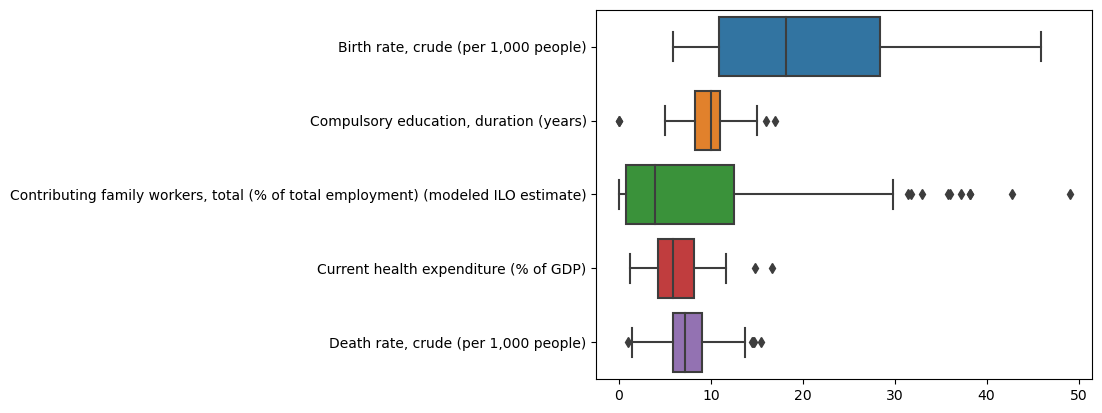

In [88]:
box_ctry = sns.boxplot(data=ctry_df[['Birth rate, crude (per 1,000 people)',
       'Compulsory education, duration (years)',
       'Contributing family workers, total (% of total employment) (modeled ILO estimate)',
       'Current health expenditure (% of GDP)',
       'Death rate, crude (per 1,000 people)']], orient='h')

In [89]:
ctry_df['Compulsory education, duration (years)'].sort_values(ascending=False).head()

172   17.00
64    16.00
46    15.00
159   15.00
77    15.00
Name: Compulsory education, duration (years), dtype: float64

In [90]:
ctry_df['Compulsory education, duration (years)'].sort_values(ascending=False).tail()

11    5.00
95    5.00
109   5.00
141   0.00
122   0.00
Name: Compulsory education, duration (years), dtype: float64

In [91]:
ctry_df.iloc[[172,64]]

Country Name  \
172  Venezuela, RB   
64       Guatemala   

     Access to clean fuels and technologies for cooking (% of population)  \
172                                              95.90                      
64                                               46.30                      

     Access to electricity (% of population)  \
172                                    99.84   
64                                     95.43   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
172                                              85.34               
64                                               71.73               

     Age dependency ratio (% of working-age population)  \
172                                              56.81    
64                                               63.37    

     Birth rate, crude (per 1,000 people)  \
172                                 16.89   
64                                  22.86   

     Compulsory education, duration (years)  \
172                                   17.00   
64                                    16.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
172                                               0.47                                   
64                                                8.38                                   

     Current health expenditure (% of GDP)  \
172                                   2.19   
64                                    6.19   

     Death rate, crude (per 1,000 people)  ...  \
172                                  7.02  ...   
64                                   4.89  ...   

     School enrollment, tertiary (% gross)  \
172                                  79.30   
64                                   22.14   

     Secondary education, duration (years)  \
172                                   5.00   
64                                    6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
172                                               3.02                                                      
64                                                1.63                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
172                                               5.09                     
64                                                2.19                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
172                                              12.71                                      
64                                                4.47                                      

     Urban population (% of total population)  \
172                                     88.24   
64                                      51.44   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
172                               -2.87                               -1.43   
64                                 2.31                               -0.33   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
172                                              37.25                             
64                                               33.76                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
172                                              60.38                                
64                                               63.44                                

[2 rows x 57 columns]

Venezuela and Guatemala are both located in the Latin America & Caribbean region. As an aggregate, this region ranks around the middle when looking at tertiary enrollment rates. By individual countries, with rates of 79.30% and 22.14%, respectively, Venezuela is in the top 25 countries while Guatemala is in the bottom half of the list.

In [92]:
ctry_df.iloc[[141,122]]

Country Name  \
141   Solomon Islands   
122  Papua New Guinea   

     Access to clean fuels and technologies for cooking (% of population)  \
141                                               8.90                      
122                                               9.30                      

     Access to electricity (% of population)  \
141                                    69.40   
122                                    23.60   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
141                                              61.36               
122                                              57.10               

     Age dependency ratio (% of working-age population)  \
141                                              76.20    
122                                              61.86    

     Birth rate, crude (per 1,000 people)  \
141                                 30.76   
122                                 26.37   

     Compulsory education, duration (years)  \
141                                    0.00   
122                                    0.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
141                                              49.04                                   
122                                              18.19                                   

     Current health expenditure (% of GDP)  \
141                                   4.46   
122                                   2.33   

     Death rate, crude (per 1,000 people)  ...  \
141                                  4.99  ...   
122                                  6.47  ...   

     School enrollment, tertiary (% gross)  \
141                                   1.30   
122                                   1.78   

     Secondary education, duration (years)  \
141                                   7.00   
122                                   6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
141                                               1.62                                                      
122                                               1.70                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
141                                               0.74                     
122                                               2.43                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
141                                               1.43                                      
122                                               4.73                                      

     Urban population (% of total population)  \
141                                     24.21   
122                                     13.25   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
141                                4.28                                0.49   
122                                2.87                                0.09   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
141                                              61.64                             
122                                              74.40                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
141                                              37.36                                
122                                              22.86                                

[2 rows x 57 columns]

Solomon Islands and Papua New Guinea are both located in the East Asia & Pacific region that as an aggregate fell somewhere in the middle when comes to tertiary education enrollment. However, as individual countries, as seen here, their tertiary enrollment rates are among the lowest, 1.30% and 1.78%, respectively.

In [93]:
ctry_df['Contributing family workers, total (% of total employment) (modeled ILO estimate)']\
.sort_values(ascending=False).head(15)

141   49.04
144   42.75
24    38.23
95    38.17
111   37.24
30    35.98
54    35.77
8     33.02
155   31.79
115   31.42
25    29.80
17    29.77
51    29.70
176   28.83
87    26.75
Name: Contributing family workers, total (% of total employment) (modeled ILO estimate), dtype: float64

In [94]:
ctry_df['Current health expenditure (% of GDP)'].sort_values(ascending=False).head()

168   16.68
0     14.83
61    11.70
90    11.41
5     11.38
Name: Current health expenditure (% of GDP), dtype: float64

In [95]:
ctry_df.iloc[[168,0]]

Country Name  \
168  United States   
0      Afghanistan   

     Access to clean fuels and technologies for cooking (% of population)  \
168                                             100.00                      
0                                                32.45                      

     Access to electricity (% of population)  \
168                                   100.00   
0                                      97.70   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
168                                              16.41               
0                                                86.80               

     Age dependency ratio (% of working-age population)  \
168                                              52.74    
0                                                87.65    

     Birth rate, crude (per 1,000 people)  \
168                                 11.40   
0                                   36.47   

     Compulsory education, duration (years)  \
168                                   12.00   
0                                      9.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
168                                               0.05                                   
0                                                21.58                                   

     Current health expenditure (% of GDP)  \
168                                  16.68   
0                                    14.83   

     Death rate, crude (per 1,000 people)  ...  \
168                                  8.70  ...   
0                                    6.79  ...   

     School enrollment, tertiary (% gross)  \
168                                  87.89   
0                                     9.69   

     Secondary education, duration (years)  \
168                                   6.00   
0                                     6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
168                                               9.57                                                      
0                                                 0.02                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
168                                               3.67                     
0                                                11.09                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
168                                               8.37                                      
0                                                17.34                                      

     Urban population (% of total population)  \
168                                     82.46   
0                                       25.75   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
168                                0.70                                0.90   
0                                  3.92                               -1.01   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
168                                               3.98                             
0                                                81.15                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
168                                              93.91                                
0                                                16.83                                

[2 rows x 57 columns]

The country with the highest current health expenditure (% of GDP) is located in North America, and the second highest in South Asia. This is a little different than the pattern we have been seeing among these regions. This could be due to the fact that we are working with percentage of GDP. However, when we look at GDP in dollars, we see that both countries are still high up on that scale.

In [100]:
ctry_df['Death rate, crude (per 1,000 people)'].sort_values(ascending=False).head()

23    15.50
165   14.70
136   14.60
88    14.50
93    13.70
Name: Death rate, crude (per 1,000 people), dtype: float64

In [101]:
ctry_df['Death rate, crude (per 1,000 people)'].sort_values(ascending=False).tail()

119   2.21
85    2.19
10    2.00
166   1.47
128   0.99
Name: Death rate, crude (per 1,000 people), dtype: float64

In [102]:
ctry_df.iloc[[23,128]]

Country Name  \
23      Bulgaria   
128        Qatar   

     Access to clean fuels and technologies for cooking (% of population)  \
23                                               88.65                      
128                                             100.00                      

     Access to electricity (% of population)  \
23                                     99.20   
128                                   100.00   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
23                                               39.24               
128                                               7.55               

     Age dependency ratio (% of working-age population)  \
23                                               56.28    
128                                              18.71    

     Birth rate, crude (per 1,000 people)  \
23                                   8.80   
128                                 10.74   

     Compulsory education, duration (years)  \
23                                    11.00   
128                                    9.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
23                                                0.62                                   
128                                               0.00                                   

     Current health expenditure (% of GDP)  \
23                                    7.09   
128                                   3.51   

     Death rate, crude (per 1,000 people)  ...  \
23                                  15.50  ...   
128                                  0.99  ...   

     School enrollment, tertiary (% gross)  \
23                                   73.38   
128                                  18.95   

     Secondary education, duration (years)  \
23                                    8.00   
128                                   6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
23                                               11.92                                                      
128                                               1.15                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
23                                                4.23                     
128                                               0.10                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
23                                                8.90                                      
128                                               0.42                                      

     Urban population (% of total population)  \
23                                      75.35   
128                                     99.19   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
23                                -0.25                                0.36   
128                                1.51                               -1.31   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
23                                                7.28                             
128                                               0.10                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
23                                               89.17                                
128                                              99.57                                

[2 rows x 57 columns]

Differences in death rate are not so far apart. Looking at the highest and lowest, the former was in Bulgaria, located in Europe & Central Asia, and the latter in Qatar, located in the Middle East & North Africa region.

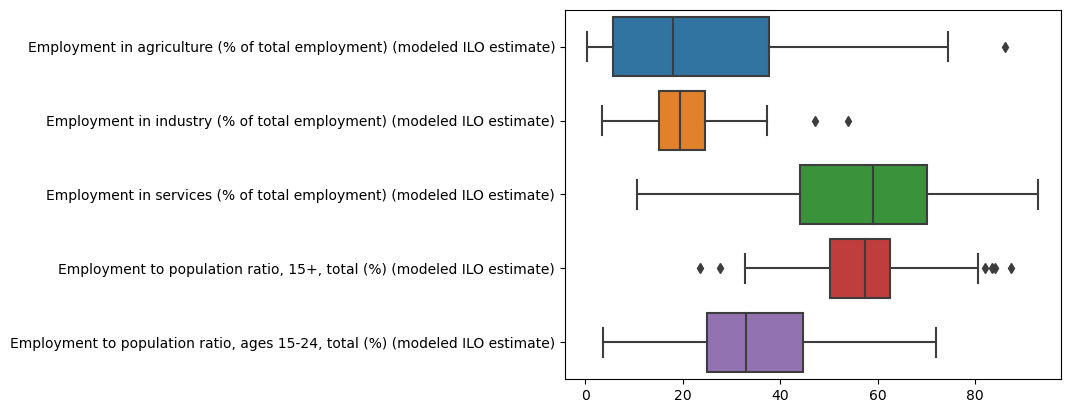

In [103]:
box_ctry = sns.boxplot(data=ctry_df[['Employment in agriculture (% of total employment) (modeled ILO estimate)',
       'Employment in industry (% of total employment) (modeled ILO estimate)',
       'Employment in services (% of total employment) (modeled ILO estimate)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)']], orient='h')

In [104]:
ctry_df['Employment in agriculture (% of total employment) (modeled ILO estimate)']\
.sort_values(ascending=False).head()

25    86.06
24    74.38
95    74.19
115   71.31
108   71.25
Name: Employment in agriculture (% of total employment) (modeled ILO estimate), dtype: float64

In [105]:
ctry_df.iloc[[25]]

Country Name  \
25      Burundi   

    Access to clean fuels and technologies for cooking (% of population)  \
25                                               0.20                      

    Access to electricity (% of population)  \
25                                     9.84   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
25                                              54.86               

    Age dependency ratio (% of working-age population)  \
25                                              98.21    

    Birth rate, crude (per 1,000 people)  \
25                                 36.32   

    Compulsory education, duration (years)  \
25                                    6.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
25                                              29.80                                   

    Current health expenditure (% of GDP)  \
25                                   6.54   

    Death rate, crude (per 1,000 people)  ...  \
25                                  7.35  ...   

    School enrollment, tertiary (% gross)  \
25                                   3.92   

    Secondary education, duration (years)  \
25                                   6.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
25                                               4.13                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
25                                               0.87                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
25                                               1.35                                      

    Urban population (% of total population)  \
25                                     13.37   

    Urban population growth (annual %)  Voice and Accountability: Estimate  \
25                                5.79                               -1.72   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
25                                              86.54                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
25                                              12.21                                

[1 rows x 57 columns]

In [106]:
ctry_df['Employment in industry (% of total employment) (modeled ILO estimate)']\
.sort_values(ascending=False).head()

128   53.92
119   47.04
43    37.25
139   36.09
10    35.09
Name: Employment in industry (% of total employment) (modeled ILO estimate), dtype: float64

In [107]:
ctry_df.iloc[[128,119]]

Country Name  \
128        Qatar   
119         Oman   

     Access to clean fuels and technologies for cooking (% of population)  \
128                                             100.00                      
119                                             100.00                      

     Access to electricity (% of population)  \
128                                   100.00   
119                                   100.00   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
128                                               7.55               
119                                              11.32               

     Age dependency ratio (% of working-age population)  \
128                                              18.71    
119                                              36.47    

     Birth rate, crude (per 1,000 people)  \
128                                 10.74   
119                                 19.30   

     Compulsory education, duration (years)  \
128                                    9.00   
119                                   10.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
128                                               0.00                                   
119                                               0.15                                   

     Current health expenditure (% of GDP)  \
128                                   3.51   
119                                   4.39   

     Death rate, crude (per 1,000 people)  ...  \
128                                  0.99  ...   
119                                  2.21  ...   

     School enrollment, tertiary (% gross)  \
128                                  18.95   
119                                  40.45   

     Secondary education, duration (years)  \
128                                   6.00   
119                                   8.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
128                                               1.15                                                      
119                                               0.88                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
128                                               0.10                     
119                                               1.85                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
128                                               0.42                                      
119                                               5.39                                      

     Urban population (% of total population)  \
128                                     99.19   
119                                     85.44   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
128                                1.51                               -1.31   
119                                1.10                               -1.15   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
128                                               0.10                             
119                                               2.43                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
128                                              99.57                                
119                                              96.46                                

[2 rows x 57 columns]

In [108]:
ctry_df['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']\
.sort_values(ascending=False).head()

128   87.32
95    83.97
141   83.36
155   81.97
166   80.55
Name: Employment to population ratio, 15+, total (%) (modeled ILO estimate), dtype: float64

In [109]:
ctry_df['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']\
.sort_values(ascending=False).tail()

175   33.10
174   33.05
81    32.65
142   27.62
45    23.61
Name: Employment to population ratio, 15+, total (%) (modeled ILO estimate), dtype: float64

In [110]:
ctry_df.iloc[[142,45]]

Country Name  \
142      Somalia   
45      Djibouti   

     Access to clean fuels and technologies for cooking (% of population)  \
142                                               3.10                      
45                                                9.20                      

     Access to electricity (% of population)  \
142                                    49.20   
45                                     64.70   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
142                                             121.13               
45                                               22.72               

     Age dependency ratio (% of working-age population)  \
142                                             100.20    
45                                               56.43    

     Birth rate, crude (per 1,000 people)  \
142                                 44.56   
45                                  22.75   

     Compulsory education, duration (years)  \
142                                    9.00   
45                                    10.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
142                                              26.72                                   
45                                                1.17                                   

     Current health expenditure (% of GDP)  \
142                                   1.26   
45                                    2.02   

     Death rate, crude (per 1,000 people)  ...  \
142                                 11.04  ...   
45                                   8.42  ...   

     School enrollment, tertiary (% gross)  \
142                                   2.46   
45                                    5.35   

     Secondary education, duration (years)  \
142                                   6.00   
45                                    7.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
142                                               0.00                                                      
45                                                0.40                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
142                                              18.83                     
45                                               26.32                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
142                                              33.91                                      
45                                               73.91                                      

     Urban population (% of total population)  \
142                                     45.55   
45                                      77.92   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
142                                4.92                               -1.85   
45                                 1.75                               -1.42   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
142                                              87.90                             
45                                               47.46                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
142                                              11.02                                
45                                               48.28                                

[2 rows x 57 columns]

Some of these values appear to be true outliers; however, we will keep them since the differences are not too significant.

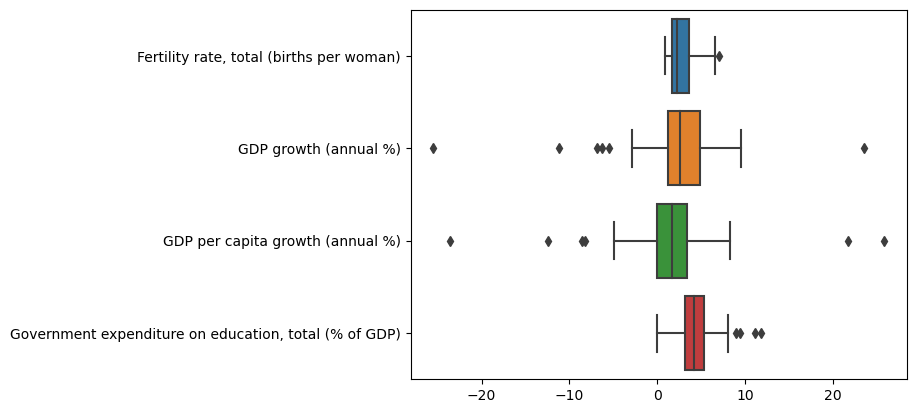

In [111]:
box_ctry = sns.boxplot(data=ctry_df[['Fertility rate, total (births per woman)',
       'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Government expenditure on education, total (% of GDP)']], orient='h')

In [112]:
ctry_df['Fertility rate, total (births per woman)'].sort_values(ascending=False).head()

115   6.96
142   6.53
31    6.41
36    6.25
99    6.10
Name: Fertility rate, total (births per woman), dtype: float64

These values are not so far off, so we will keep them.

In [113]:
ctry_df['GDP growth (annual %)'].sort_values(ascending=False).head()

157   23.51
131    9.46
54     8.36
11     7.88
26     7.64
Name: GDP growth (annual %), dtype: float64

In [114]:
ctry_df['GDP growth (annual %)'].sort_values(ascending=False).tail()

50     -5.48
177    -6.33
89     -6.91
92    -11.20
172   -25.50
Name: GDP growth (annual %), dtype: float64

In [115]:
ctry_df['GDP per capita growth (annual %)'].sort_values(ascending=False).head()

144   25.77
157   21.72
5      8.21
131    6.88
11     6.69
Name: GDP per capita growth (annual %), dtype: float64

In [116]:
ctry_df['GDP per capita growth (annual %)'].sort_values(ascending=False).tail()

149    -4.97
177    -8.18
50     -8.58
92    -12.43
172   -23.55
Name: GDP per capita growth (annual %), dtype: float64

Observations on rows 157, 144, 92 and 72 appear to be true outliers, which may affect the results of analysis. Further exploration should tell us whether we can keep or drop these rows or the columns.

In [117]:
ctry_df.iloc[[157,144,92,172]]

Country Name  \
157    Timor-Leste   
144    South Sudan   
92           Libya   
172  Venezuela, RB   

     Access to clean fuels and technologies for cooking (% of population)  \
157                                              12.85                      
144                                               0.00                      
92                                              100.00                      
172                                              95.90                      

     Access to electricity (% of population)  \
157                                    90.63   
144                                     6.77   
92                                     68.47   
172                                    99.84   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
157                                              35.21               
144                                              98.79               
92                                                7.05               
172                                              85.34               

     Age dependency ratio (% of working-age population)  \
157                                              72.53    
144                                              96.54    
92                                               53.16    
172                                              56.81    

     Birth rate, crude (per 1,000 people)  \
157                                 25.51   
144                                 29.06   
92                                  18.73   
172                                 16.89   

     Compulsory education, duration (years)  \
157                                    9.00   
144                                    8.00   
92                                     9.00   
172                                   17.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
157                                              21.61                                   
144                                              42.75                                   
92                                                1.17                                   
172                                               0.47                                   

     Current health expenditure (% of GDP)  \
157                                   5.96   
144                                   4.66   
92                                    6.05   
172                                   2.19   

     Death rate, crude (per 1,000 people)  ...  \
157                                  6.89  ...   
144                                 10.53  ...   
92                                   5.45  ...   
172                                  7.02  ...   

     School enrollment, tertiary (% gross)  \
157                                  17.75   
144                                   0.75   
92                                   60.50   
172                                  79.30   

     Secondary education, duration (years)  \
157                                   6.00   
144                                   6.00   
92                                    6.00   
172                                   5.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
157                                               0.40                                                      
144                                               6.30                                                      
92                                                0.01                                                      
172                                               3.02                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
157                                               4.45                     
144                                              12.20            

In [118]:
ctry_df['Government expenditure on education, total (% of GDP)'].sort_values(ascending=False).head()

105   11.78
141   11.13
144    9.35
110    8.93
90     7.99
Name: Government expenditure on education, total (% of GDP), dtype: float64

The differences between these values for government expenditure on education (% of GDP) is not too significant, so we can keep them.

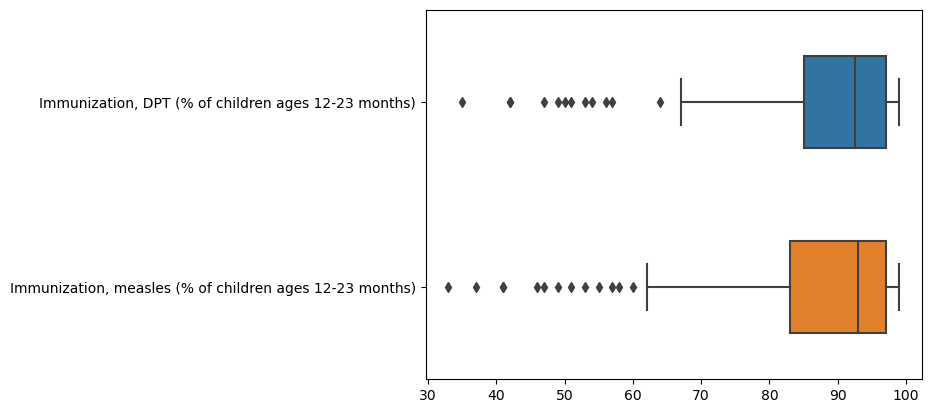

In [119]:
box_ctry = sns.boxplot(data=ctry_df[['Immunization, DPT (% of children ages 12-23 months)',
       'Immunization, measles (% of children ages 12-23 months)']], orient='h', width=.5)

In [120]:
ctry_df['Immunization, DPT (% of children ages 12-23 months)'].sort_values(ascending=False).tail(15)

95    68.00
132   68.00
28    67.00
172   64.00
3     57.00
116   56.00
153   54.00
50    53.00
68    51.00
31    50.00
144   49.00
65    47.00
30    42.00
142   42.00
122   35.00
Name: Immunization, DPT (% of children ages 12-23 months), dtype: float64

In [121]:
ctry_df['Immunization, measles (% of children ages 12-23 months)'].sort_values(ascending=False).tail(15)

150   64.00
58    62.00
28    60.00
54    58.00
116   57.00
95    55.00
50    53.00
3     51.00
144   49.00
65    47.00
142   46.00
31    41.00
30    41.00
122   37.00
106   33.00
Name: Immunization, measles (% of children ages 12-23 months), dtype: float64

For DPT immunization, with the exception of observations 3, 30 and 122, all other values are close. For measles immunization, the values are close enough that we would not consider them outliers. These values need not be dropped at this point. 

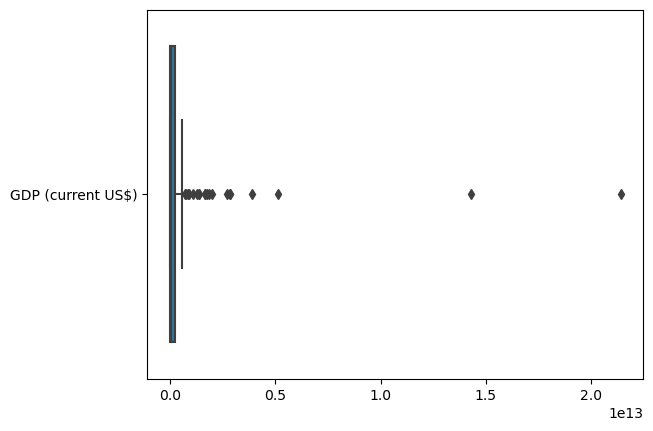

In [122]:
box_ctry = sns.boxplot(data=ctry_df[['GDP (current US$)']], orient='h')

In [123]:
ctry_df['GDP (current US$)'].sort_values(ascending=False).head(15)

168   21400000000000.00
33    14300000000000.00
80     5120000000000.00
61     3890000000000.00
167    2860000000000.00
72     2840000000000.00
57     2730000000000.00
78     2010000000000.00
21     1870000000000.00
29     1740000000000.00
130    1690000000000.00
84     1650000000000.00
6      1390000000000.00
145    1390000000000.00
103    1270000000000.00
Name: GDP (current US$), dtype: float64

In [124]:
ctry_df.iloc[[168,33]]

Country Name  \
168  United States   
33           China   

     Access to clean fuels and technologies for cooking (% of population)  \
168                                             100.00                      
33                                               79.40                      

     Access to electricity (% of population)  \
168                                   100.00   
33                                    100.00   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
168                                              16.41               
33                                               12.94               

     Age dependency ratio (% of working-age population)  \
168                                              52.74    
33                                               43.44    

     Birth rate, crude (per 1,000 people)  \
168                                 11.40   
33                                  10.41   

     Compulsory education, duration (years)  \
168                                   12.00   
33                                     9.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
168                                               0.05                                   
33                                               10.32                                   

     Current health expenditure (% of GDP)  \
168                                  16.68   
33                                    5.35   

     Death rate, crude (per 1,000 people)  ...  \
168                                  8.70  ...   
33                                   7.09  ...   

     School enrollment, tertiary (% gross)  \
168                                  87.89   
33                                   53.76   

     Secondary education, duration (years)  \
168                                   6.00   
33                                    6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
168                                               9.57                                                      
33                                                5.73                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
168                                               3.67                     
33                                                4.56                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
168                                               8.37                                      
33                                               10.73                                      

     Urban population (% of total population)  \
168                                     82.46   
33                                      60.31   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
168                                0.70                                0.90   
33                                 2.29                               -1.63   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
168                                               3.98                             
33                                               41.85                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
168                                              93.91                                
33                                               53.96                                

[2 rows x 57 columns]

This makes sense. The United States economy, as of 2019, makes up nearly a quarter of the global economy, which is a significant slice. Contributing factors include advanced technology and infrastructure. Likewise, China's economic growth continues to be fueled by technology, mass manufacturing and exports.

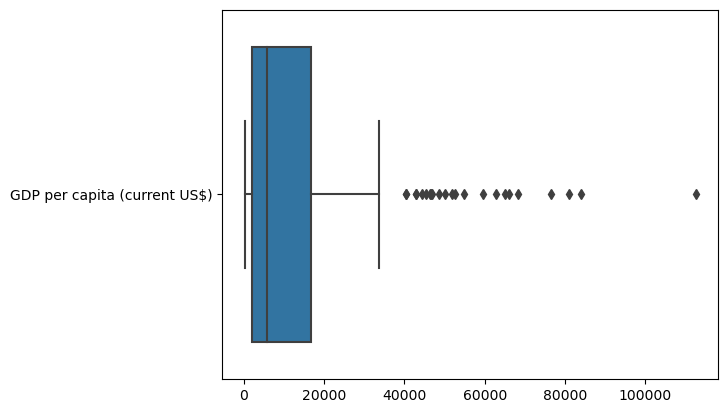

In [125]:
box_ctry = sns.boxplot(data=ctry_df[['GDP per capita (current US$)']], orient='h')

In [126]:
ctry_df['GDP per capita (current US$)'].sort_values(ascending=False).head(15)

94    112621.82
152    84121.93
76     80927.07
118    76430.59
71     68403.14
138    66070.47
168    65120.39
128    62827.40
44     59592.98
6      54941.07
112    52476.27
151    51939.43
7      50070.40
56     48629.86
61     46793.69
Name: GDP per capita (current US$), dtype: float64

In [127]:
ctry_df.iloc[[94]]

Country Name  \
94   Luxembourg   

    Access to clean fuels and technologies for cooking (% of population)  \
94                                             100.00                      

    Access to electricity (% of population)  \
94                                   100.00   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
94                                               4.31               

    Age dependency ratio (% of working-age population)  \
94                                              43.82    

    Birth rate, crude (per 1,000 people)  \
94                                 10.00   

    Compulsory education, duration (years)  \
94                                   12.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
94                                               0.92                                   

    Current health expenditure (% of GDP)  \
94                                   5.44   

    Death rate, crude (per 1,000 people)  ...  \
94                                  6.90  ...   

    School enrollment, tertiary (% gross)  \
94                                  18.43   

    Secondary education, duration (years)  \
94                                   7.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
94                                              11.53                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
94                                               5.59                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
94                                              16.99                                      

    Urban population (% of total population)  \
94                                     91.22   

    Urban population growth (annual %)  Voice and Accountability: Estimate  \
94                                2.23                                1.49   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
94                                               5.47                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
94                                              91.26                                

[1 rows x 57 columns]

This also makes sense, as Luxembourg excels in industry and financial services and is known to be business friendly have a productive working population, contributing to the highest GDP per capita (current US$).

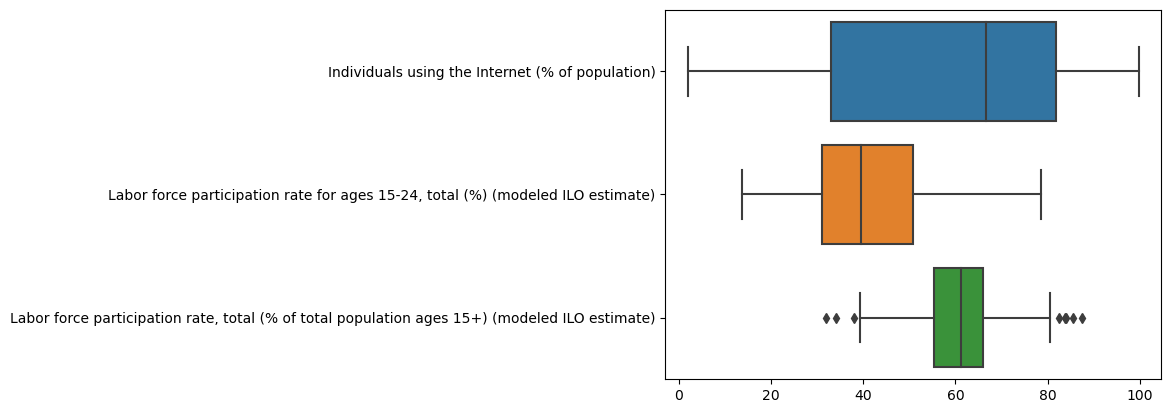

In [128]:
box_ctry = sns.boxplot(data=ctry_df[['Individuals using the Internet (% of population)',
       'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)']], orient='h')

In [129]:
ctry_df['Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)']\
.sort_values(ascending=False).head()

128   87.41
95    85.55
141   83.98
155   83.82
166   82.47
Name: Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate), dtype: float64

In [130]:
ctry_df['Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)']\
.sort_values(ascending=False).tail()

111   40.19
81    39.24
175   38.03
142   34.03
45    32.03
Name: Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate), dtype: float64

In [131]:
ctry_df.iloc[[128,95,142,45]]

Country Name  \
128        Qatar   
95    Madagascar   
142      Somalia   
45      Djibouti   

     Access to clean fuels and technologies for cooking (% of population)  \
128                                             100.00                      
95                                                1.20                      
142                                               3.10                      
45                                                9.20                      

     Access to electricity (% of population)  \
128                                   100.00   
95                                     31.04   
142                                    49.20   
45                                     64.70   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
128                                               7.55               
95                                              123.26               
142                                             121.13               
45                                               22.72               

     Age dependency ratio (% of working-age population)  \
128                                              18.71    
95                                               76.10    
142                                             100.20    
45                                               56.43    

     Birth rate, crude (per 1,000 people)  \
128                                 10.74   
95                                  31.70   
142                                 44.56   
45                                  22.75   

     Compulsory education, duration (years)  \
128                                    9.00   
95                                     5.00   
142                                    9.00   
45                                    10.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
128                                               0.00                                   
95                                               38.17                                   
142                                              26.72                                   
45                                                1.17                                   

     Current health expenditure (% of GDP)  \
128                                   3.51   
95                                    3.78   
142                                   1.26   
45                                    2.02   

     Death rate, crude (per 1,000 people)  ...  \
128                                  0.99  ...   
95                                   6.52  ...   
142                                 11.04  ...   
45                                   8.42  ...   

     School enrollment, tertiary (% gross)  \
128                                  18.95   
95                                    5.35   
142                                   2.46   
45                                    5.35   

     Secondary education, duration (years)  \
128                                   6.00   
95                                    7.00   
142                                   6.00   
45                                    7.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
128                                               1.15                                                      
95                                                1.02                                                      
142                                               0.00                                                      
45                                                0.40                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
128                                               0.10                     
95                                                1.84                    

The highest labor force participation rates as of 2019 were reported by Qatar and Madagascar, while the lowest were Somalia and Djibouti. Although they appear as outliers in the boxplot, they do not differ significantly from surrounding values.

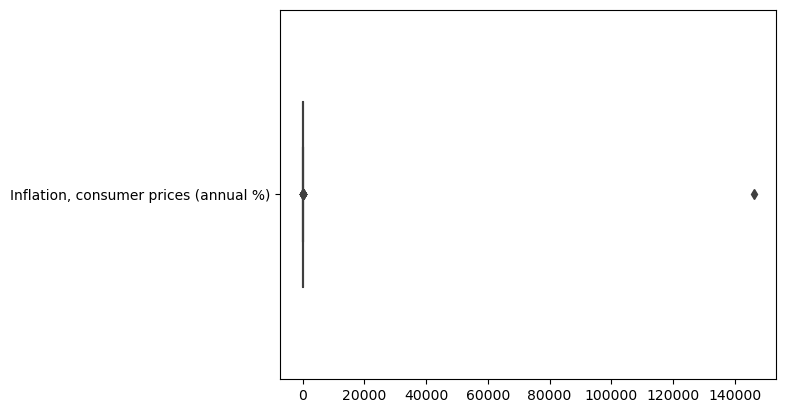

In [132]:
box_ctry = sns.boxplot(data=ctry_df[['Inflation, consumer prices (annual %)']], orient='h', width=.5)

In [133]:
ctry_df['Inflation, consumer prices (annual %)'].sort_values(ascending=False).head()

172   146101.70
177      255.30
144       87.24
4         53.80
149       50.99
Name: Inflation, consumer prices (annual %), dtype: float64

In [134]:
ctry_df.iloc[[172,177]]

Country Name  \
172  Venezuela, RB   
177       Zimbabwe   

     Access to clean fuels and technologies for cooking (% of population)  \
172                                              95.90                      
177                                              30.20                      

     Access to electricity (% of population)  \
172                                    99.84   
177                                    46.68   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
172                                              85.34               
177                                              97.35               

     Age dependency ratio (% of working-age population)  \
172                                              56.81    
177                                              81.21    

     Birth rate, crude (per 1,000 people)  \
172                                 16.89   
177                                 31.52   

     Compulsory education, duration (years)  \
172                                   17.00   
177                                    7.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
172                                               0.47                                   
177                                               9.35                                   

     Current health expenditure (% of GDP)  \
172                                   2.19   
177                                   3.66   

     Death rate, crude (per 1,000 people)  ...  \
172                                  7.02  ...   
177                                  8.04  ...   

     School enrollment, tertiary (% gross)  \
172                                  79.30   
177                                   8.88   

     Secondary education, duration (years)  \
172                                   5.00   
177                                   6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
172                                               3.02                                                      
177                                               3.63                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
172                                               5.09                     
177                                               7.37                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
172                                              12.71                                      
177                                              11.62                                      

     Urban population (% of total population)  \
172                                     88.24   
177                                     32.21   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
172                               -2.87                               -1.43   
177                                1.99                               -1.16   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
172                                              37.25                             
177                                              67.46                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
172                                              60.38                                
177                                              32.25                                

[2 rows x 57 columns]

With values significantly higher than other countries, Venezuela and Zimbabwe experienced hyperinflation.

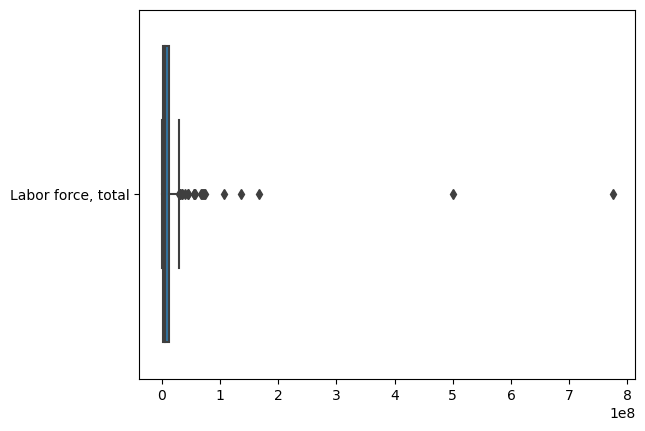

In [135]:
box_ctry = sns.boxplot(data=ctry_df[['Labor force, total']], orient='h')

In [136]:
ctry_df['Labor force, total'].sort_values(ascending=False).head(15)

33    775321104.00
72    501044031.00
168   167100511.00
73    136201932.00
21    107415119.00
130    73598523.00
120    71922561.00
11     70248864.00
80     69045531.00
116    67373496.00
103    56818605.00
173    55877866.00
54     54535675.00
125    45091808.00
61     44433744.00
Name: Labor force, total, dtype: float64

In [137]:
ctry_df.iloc[[33,72]]

Country Name  \
33        China   
72        India   

    Access to clean fuels and technologies for cooking (% of population)  \
33                                              79.40                      
72                                              63.30                      

    Access to electricity (% of population)  \
33                                   100.00   
72                                    95.89   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
33                                              12.94               
72                                              17.70               

    Age dependency ratio (% of working-age population)  \
33                                              43.44    
72                                              49.40    

    Birth rate, crude (per 1,000 people)  \
33                                 10.41   
72                                 17.05   

    Compulsory education, duration (years)  \
33                                    9.00   
72                                    8.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
33                                              10.32                                   
72                                              11.80                                   

    Current health expenditure (% of GDP)  \
33                                   5.35   
72                                   2.94   

    Death rate, crude (per 1,000 people)  ...  \
33                                  7.09  ...   
72                                  6.71  ...   

    School enrollment, tertiary (% gross)  \
33                                  53.76   
72                                  28.57   

    Secondary education, duration (years)  \
33                                   6.00   
72                                   7.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
33                                               5.73                                                      
72                                               4.92                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
33                                               4.56                     
72                                               6.51                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
33                                              10.73                                      
72                                              22.89                                      

    Urban population (% of total population)  \
33                                     60.31   
72                                     34.47   

    Urban population growth (annual %)  Voice and Accountability: Estimate  \
33                                2.29                               -1.63   
72                                2.32                                0.27   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
33                                              41.85                             
72                                              73.16                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
33                                              53.96                                
72                                              24.55                                

[2 rows x 57 columns]

It is not surprising that China and India are at the top of the list for labor force size, given such high population densities.

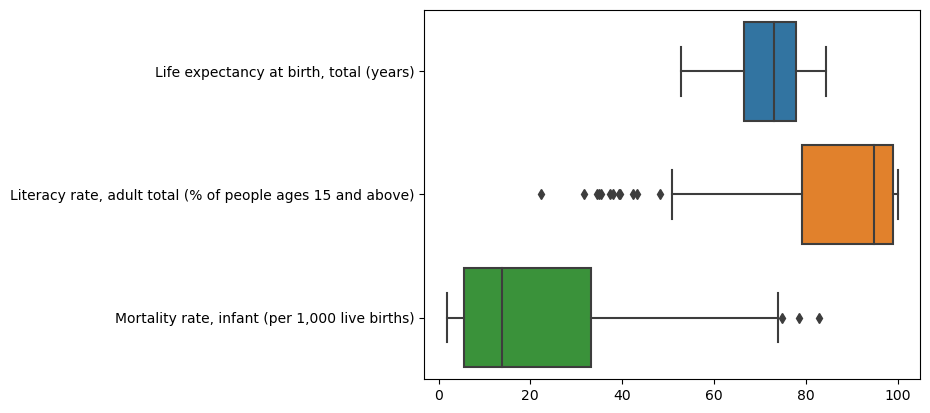

In [138]:
box_ctry = sns.boxplot(data=ctry_df[['Life expectancy at birth, total (years)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Mortality rate, infant (per 1,000 live births)']], orient='h')

In [139]:
ctry_df['Literacy rate, adult total (% of people ages 15 and above)'].sort_values(ascending=False).tail(15)

135   51.90
54    51.80
59    50.80
91    48.30
137   43.21
16    42.36
65    39.62
24    39.35
142   38.00
30    37.40
99    35.47
115   35.05
144   34.52
0     31.70
31    22.30
Name: Literacy rate, adult total (% of people ages 15 and above), dtype: float64

In [140]:
ctry_df.iloc[[31]]

Country Name  \
31         Chad   

    Access to clean fuels and technologies for cooking (% of population)  \
31                                               6.60                      

    Access to electricity (% of population)  \
31                                     8.40   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
31                                             143.45               

    Age dependency ratio (% of working-age population)  \
31                                              99.90    

    Birth rate, crude (per 1,000 people)  \
31                                 44.23   

    Compulsory education, duration (years)  \
31                                   10.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
31                                              18.98                                   

    Current health expenditure (% of GDP)  \
31                                   4.48   

    Death rate, crude (per 1,000 people)  ...  \
31                                 12.37  ...   

    School enrollment, tertiary (% gross)  \
31                                   3.25   

    Secondary education, duration (years)  \
31                                   7.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
31                                               3.73                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
31                                               1.12                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
31                                               1.53                                      

    Urban population (% of total population)  \
31                                     23.28   

    Urban population growth (annual %)  Voice and Accountability: Estimate  \
31                                4.24                               -1.43   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
31                                              89.96                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
31                                               8.82                                

[1 rows x 57 columns]

Chad, located in Central Africa, reported the lowest literacy rate in 2019. Among the neighboring values, 22.30% appears to be a true outlier.

In [141]:
ctry_df['Mortality rate, infant (per 1,000 live births)'].sort_values(ascending=False).head()

137   82.80
30    78.60
142   74.90
116   73.90
31    69.30
Name: Mortality rate, infant (per 1,000 live births), dtype: float64

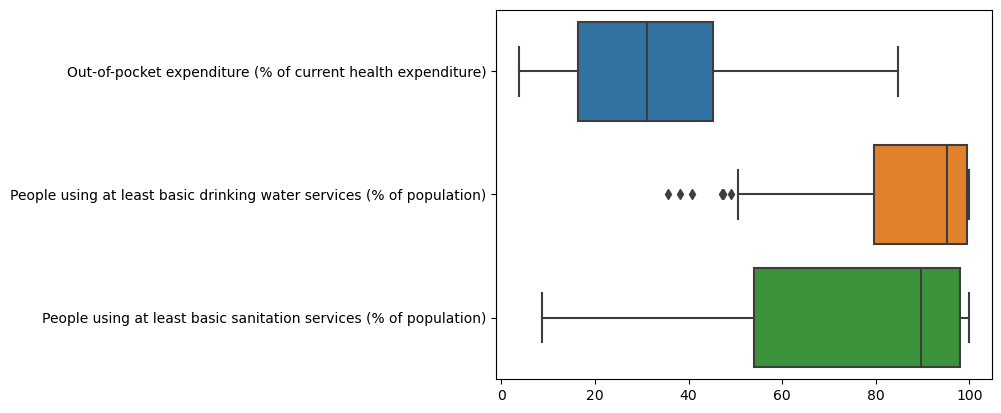

In [142]:
box_ctry = sns.boxplot(data=ctry_df[['Out-of-pocket expenditure (% of current health expenditure)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)']], orient='h')

In [143]:
ctry_df['People using at least basic drinking water services (% of population)'].sort_values(ascending=False).tail(10)

51    51.85
95    51.17
31    50.50
24    49.00
115   47.37
54    47.25
122   47.08
144   40.84
30    38.21
36    35.68
Name: People using at least basic drinking water services (% of population), dtype: float64

In [144]:
ctry_df.iloc[[144,30,36]]

Country Name  \
144               South Sudan   
30   Central African Republic   
36           Congo, Dem. Rep.   

     Access to clean fuels and technologies for cooking (% of population)  \
144                                               0.00                      
30                                                0.80                      
36                                                4.20                      

     Access to electricity (% of population)  \
144                                     6.77   
30                                     14.30   
36                                     19.10   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
144                                              98.79               
30                                              162.61               
36                                              110.75               

     Age dependency ratio (% of working-age population)  \
144                                              96.54    
30                                              103.54    
36                                               97.85    

     Birth rate, crude (per 1,000 people)  \
144                                 29.06   
30                                  41.92   
36                                  42.66   

     Compulsory education, duration (years)  \
144                                    8.00   
30                                    10.00   
36                                     6.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
144                                              42.75                                   
30                                               35.98                                   
36                                               15.87                                   

     Current health expenditure (% of GDP)  \
144                                   4.66   
30                                    7.83   
36                                    3.54   

     Death rate, crude (per 1,000 people)  ...  \
144                                 10.53  ...   
30                                  10.87  ...   
36                                   9.38  ...   

     School enrollment, tertiary (% gross)  \
144                                   0.75   
30                                    2.98   
36                                    6.60   

     Secondary education, duration (years)  \
144                                   6.00   
30                                    7.00   
36                                    6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
144                                               6.30                                                      
30                                                1.99                                                      
36                                                2.12                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
144                                              12.20                     
30                                                5.75                     
36                                                4.44                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
144                                              18.58                                      
30                                               10.07                                      
36                                                8.49                                      

     Urban population (% of total population)  \
144                                     19.90   
30                                      41.77   
36                                      45.05   

     Urban population growth (annual %)  Voice and Accountability

The three countries reporting the lowest percentage of the population with access to at least basic drinking water services, South Sudan, Central African Republic, and the Democratic Republic of the Congo (COD) are all located in Africa. Looking at the target, these countries appear to be on different parts of the scale, with COD reporting the highest tertiary enrollment rate among the three. For access to other utilities (electricity and cooking fuels), COD's rate was higher than the other two.

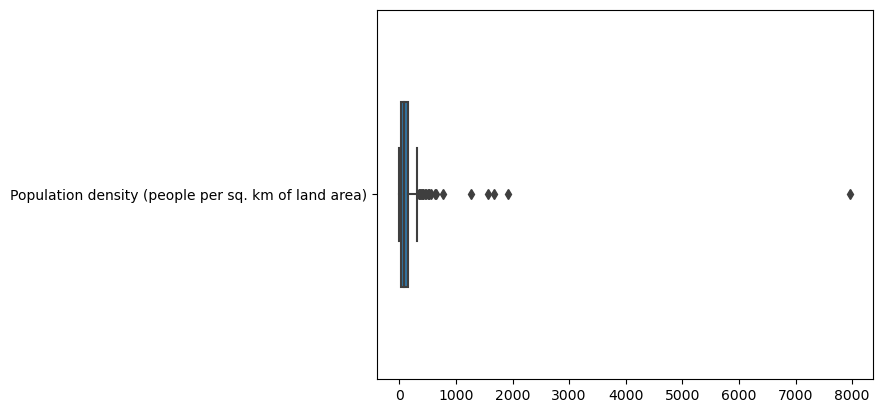

In [145]:
box_ctry = sns.boxplot(data=ctry_df[['Population density (people per sq. km of land area)']], orient='h', width=.5)

In [146]:
ctry_df['Population density (people per sq. km of land area)'].sort_values(ascending=False).head(15)

138   7965.88
10    1915.63
98    1681.69
100   1575.19
11    1271.54
174    778.29
12     651.58
102    633.94
89     565.19
84     530.38
131    520.27
112    515.14
72     465.19
25     462.42
35     425.03
Name: Population density (people per sq. km of land area), dtype: float64

In [147]:
ctry_df.iloc[[138]]

Country Name  \
138    Singapore   

     Access to clean fuels and technologies for cooking (% of population)  \
138                                             100.00                      

     Access to electricity (% of population)  \
138                                   100.00   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
138                                               2.51               

     Age dependency ratio (% of working-age population)  \
138                                              32.28    

     Birth rate, crude (per 1,000 people)  \
138                                  8.80   

     Compulsory education, duration (years)  \
138                                    6.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
138                                               0.41                                   

     Current health expenditure (% of GDP)  \
138                                   4.42   

     Death rate, crude (per 1,000 people)  ...  \
138                                  5.00  ...   

     School enrollment, tertiary (% gross)  \
138                                  91.09   

     Secondary education, duration (years)  \
138                                   4.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
138                                               1.87                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
138                                               3.10                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
138                                               7.68                                      

     Urban population (% of total population)  \
138                                    100.00   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
138                                1.14                               -0.21   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
138                                               9.20                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
138                                              86.54                                

[1 rows x 57 columns]

As a populous country, and with the effect of immigration over time, Singapore having the highest population density per square kilometer of land area is not surprising.

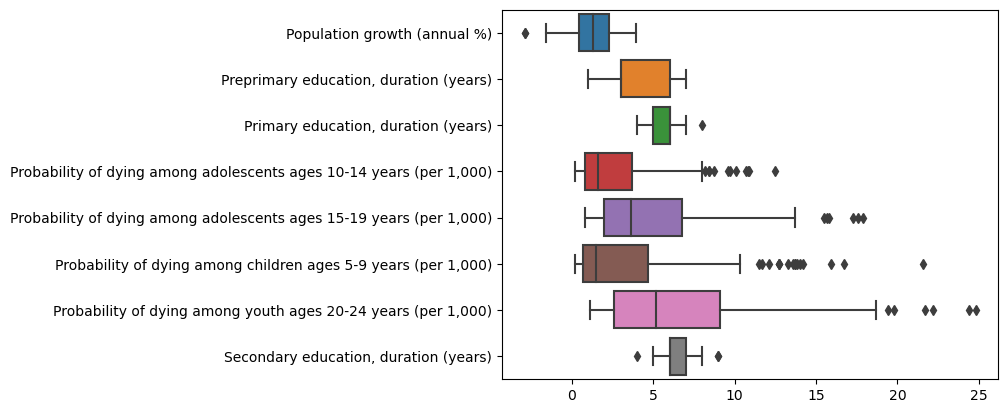

In [148]:
box_ctry = sns.boxplot(data=ctry_df[['Population growth (annual %)','Preprimary education, duration (years)',
       'Primary education, duration (years)',
       'Probability of dying among adolescents ages 10-14 years (per 1,000)',
       'Probability of dying among adolescents ages 15-19 years (per 1,000)',
       'Probability of dying among children ages 5-9 years (per 1,000)',
       'Probability of dying among youth ages 20-24 years (per 1,000)',
       'Secondary education, duration (years)']], orient='h')

In [149]:
ctry_df['Population growth (annual %)'].sort_values(ascending=False).tail()

78    -1.15
19    -1.17
104   -1.60
89    -2.88
172   -2.90
Name: Population growth (annual %), dtype: float64

In [150]:
ctry_df['Primary education, duration (years)'].sort_values(ascending=False).head()

76    8.00
177   7.00
90    7.00
44    7.00
155   7.00
Name: Primary education, duration (years), dtype: float64

In [151]:
ctry_df['Probability of dying among adolescents ages 10-14 years (per 1,000)'].sort_values(ascending=False).head(10)

115   12.50
30    10.90
31    10.80
39    10.70
137   10.10
142    9.70
36     9.60
99     8.70
25     8.40
144    8.40
Name: Probability of dying among adolescents ages 10-14 years (per 1,000), dtype: float64

In [152]:
ctry_df['Probability of dying among adolescents ages 15-19 years (per 1,000)'].sort_values(ascending=False).head(10)

36    17.90
142   17.60
137   17.30
31    15.80
157   15.70
144   15.50
164   13.70
65    13.70
0     13.40
91    13.00
Name: Probability of dying among adolescents ages 15-19 years (per 1,000), dtype: float64

In [153]:
ctry_df['Probability of dying among children ages 5-9 years (per 1,000)'].sort_values(ascending=False).head(20)

115   21.60
142   16.70
137   15.90
39    14.20
28    14.00
30    13.80
144   13.70
99    13.70
116   13.60
31    13.30
95    12.70
16    12.70
65    12.70
24    12.10
25    11.70
36    11.50
3     10.30
53    10.00
91     9.70
50     9.60
Name: Probability of dying among children ages 5-9 years (per 1,000), dtype: float64

In [154]:
ctry_df['Probability of dying among youth ages 20-24 years (per 1,000)'].sort_values(ascending=False).head(10)

142   24.80
30    24.40
144   22.20
108   21.70
36    19.80
31    19.40
3     18.70
65    18.70
137   18.40
0     18.10
Name: Probability of dying among youth ages 20-24 years (per 1,000), dtype: float64

In [155]:
ctry_df['Secondary education, duration (years)'].sort_values(ascending=False).head()

139   9.00
61    9.00
163   8.00
43    8.00
78    8.00
Name: Secondary education, duration (years), dtype: float64

In [156]:
ctry_df['Secondary education, duration (years)'].sort_values(ascending=False).tail()

124   5.00
38    5.00
76    5.00
79    5.00
138   4.00
Name: Secondary education, duration (years), dtype: float64

None of these values seem too far off.

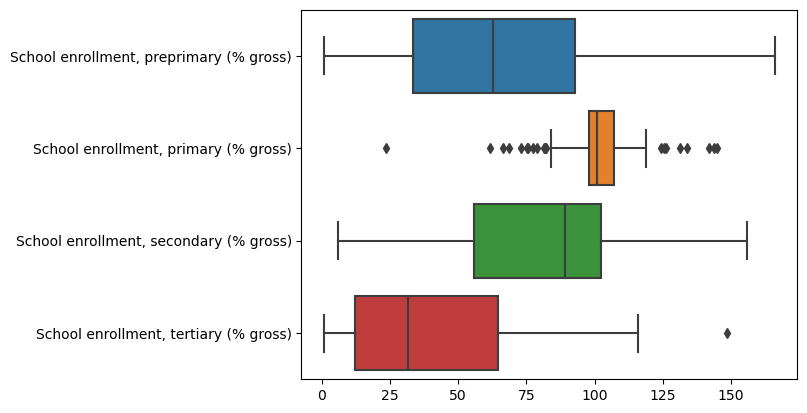

In [157]:
box_ctry = sns.boxplot(data=ctry_df[['School enrollment, preprimary (% gross)',
       'School enrollment, primary (% gross)',
       'School enrollment, secondary (% gross)',
       'School enrollment, tertiary (% gross)']], orient='h')

In [158]:
ctry_df['School enrollment, primary (% gross)'].sort_values(ascending=False).head(10)

96    144.81
137   143.73
111   142.14
95    134.06
131   131.31
151   126.16
110   125.57
158   124.32
25    118.96
66    118.69
Name: School enrollment, primary (% gross), dtype: float64

In [159]:
ctry_df['School enrollment, primary (% gross)'].sort_values(ascending=False).tail(10)

9     81.36
149   78.95
83    77.32
99    75.60
45    75.29
144   72.99
51    68.62
115   66.42
50    61.78
142   23.36
Name: School enrollment, primary (% gross), dtype: float64

In [160]:
ctry_df.iloc[[50,142]]

Country Name  \
50   Equatorial Guinea   
142            Somalia   

     Access to clean fuels and technologies for cooking (% of population)  \
50                                               24.00                      
142                                               3.10                      

     Access to electricity (% of population)  \
50                                     66.57   
142                                    49.20   

     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
50                                              148.87               
142                                             121.13               

     Age dependency ratio (% of working-age population)  \
50                                               72.51    
142                                             100.20    

     Birth rate, crude (per 1,000 people)  \
50                                  31.87   
142                                 44.56   

     Compulsory education, duration (years)  \
50                                     6.00   
142                                    9.00   

     Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
50                                                5.50                                   
142                                              26.72                                   

     Current health expenditure (% of GDP)  \
50                                    3.03   
142                                   1.26   

     Death rate, crude (per 1,000 people)  ...  \
50                                   8.58  ...   
142                                 11.04  ...   

     School enrollment, tertiary (% gross)  \
50                                    1.85   
142                                   2.46   

     Secondary education, duration (years)  \
50                                    6.00   
142                                   6.00   

     Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
50                                                6.94                                                      
142                                               0.00                                                      

     Unemployment, total (% of total labor force) (modeled ILO estimate)  \
50                                                8.28                     
142                                              18.83                     

     Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
50                                               15.94                                      
142                                              33.91                                      

     Urban population (% of total population)  \
50                                      72.63   
142                                     45.55   

     Urban population growth (annual %)  Voice and Accountability: Estimate  \
50                                 4.00                               -1.88   
142                                4.92                               -1.85   

     Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
50                                               77.86                             
142                                              87.90                             

     Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
50                                               13.14                                
142                                              11.02                                

[2 rows x 57 columns]

Somalia in East Africa reported a significantly low primary school enrollment rate in 2019, 23.36%, compared to other countries. The next lowest, Equatorial Guinea in Central Africa reported 61.78%. 

In [161]:
ctry_df['School enrollment, tertiary (% gross)'].sort_values(ascending=False).head()

63    148.53
6     115.95
162   115.04
84     98.45
4      95.45
Name: School enrollment, tertiary (% gross), dtype: float64

In [162]:
ctry_df.iloc[[63,6]]

Country Name  \
63       Greece   
6     Australia   

    Access to clean fuels and technologies for cooking (% of population)  \
63                                             100.00                      
6                                              100.00                      

    Access to electricity (% of population)  \
63                                   100.00   
6                                    100.00   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
63                                               8.31               
6                                                8.94               

    Age dependency ratio (% of working-age population)  \
63                                              56.62    
6                                               52.93    

    Birth rate, crude (per 1,000 people)  \
63                                  7.80   
6                                  12.10   

    Compulsory education, duration (years)  \
63                                   10.00   
6                                    10.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
63                                               3.16                                   
6                                                0.19                                   

    Current health expenditure (% of GDP)  \
63                                   8.20   
6                                   10.23   

    Death rate, crude (per 1,000 people)  ...  \
63                                 11.70  ...   
6                                   6.70  ...   

    School enrollment, tertiary (% gross)  \
63                                 148.53   
6                                  115.95   

    Secondary education, duration (years)  \
63                                   6.00   
6                                    6.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
63                                               7.12                                                      
6                                               10.09                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
63                                              17.31                     
6                                                5.16                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
63                                              35.04                                      
6                                               11.75                                      

    Urban population (% of total population)  \
63                                     79.39   
6                                      86.12   

    Urban population growth (annual %)  Voice and Accountability: Estimate  \
63                                0.31                                0.81   
6                                 1.62                                1.27   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
63                                              24.50                             
6                                               10.61                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
63                                              68.10                                
6                                               83.42                                

[2 rows x 57 columns]

Greece reported the highest tertiary education enrollment rate in 2019, 148.53%, followed by Australia at 115.95%. As stated earlier, a rate exceeding 100% is possible due to enrollment of over- and/or under-age students in a given education level.

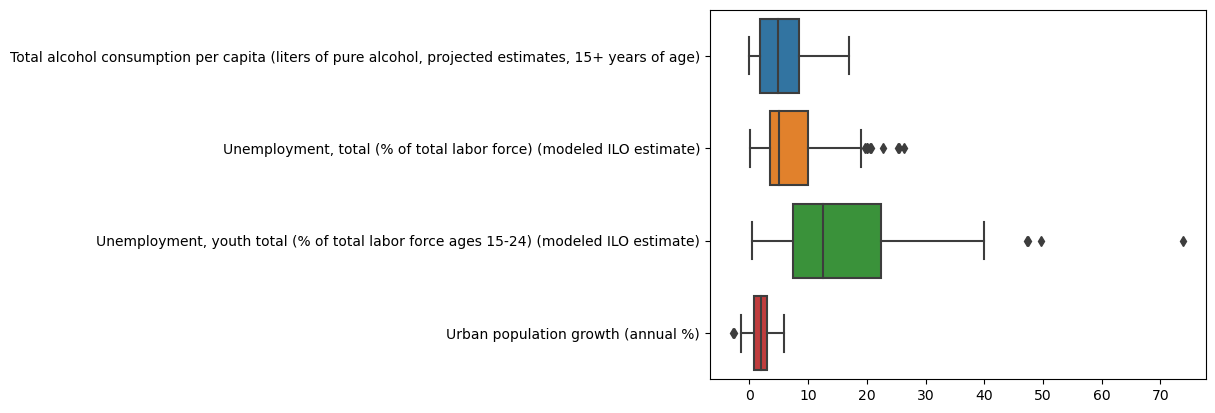

In [163]:
box_ctry = sns.boxplot(data=ctry_df[[
    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
       'Urban population growth (annual %)']], orient='h')

In [164]:
ctry_df['Unemployment, total (% of total labor force) (modeled ILO estimate)'].sort_values(ascending=False).head(10)

45    26.32
143   25.54
174   25.34
53    22.78
58    20.70
37    20.61
20    20.09
110   20.00
92    19.61
148   19.09
Name: Unemployment, total (% of total labor force) (modeled ILO estimate), dtype: float64

In [165]:
ctry_df['Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)']\
.sort_values(ascending=False).head()

45    73.91
92    49.72
143   47.41
53    47.26
174   39.98
Name: Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate), dtype: float64

In [166]:
ctry_df.iloc[[45]]

Country Name  \
45     Djibouti   

    Access to clean fuels and technologies for cooking (% of population)  \
45                                               9.20                      

    Access to electricity (% of population)  \
45                                    64.70   

    Adolescent fertility rate (births per 1,000 women ages 15-19)  \
45                                              22.72               

    Age dependency ratio (% of working-age population)  \
45                                              56.43    

    Birth rate, crude (per 1,000 people)  \
45                                 22.75   

    Compulsory education, duration (years)  \
45                                   10.00   

    Contributing family workers, total (% of total employment) (modeled ILO estimate)  \
45                                               1.17                                   

    Current health expenditure (% of GDP)  \
45                                   2.02   

    Death rate, crude (per 1,000 people)  ...  \
45                                  8.42  ...   

    School enrollment, tertiary (% gross)  \
45                                   5.35   

    Secondary education, duration (years)  \
45                                   7.00   

    Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
45                                               0.40                                                      

    Unemployment, total (% of total labor force) (modeled ILO estimate)  \
45                                              26.32                     

    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)  \
45                                              73.91                                      

    Urban population (% of total population)  \
45                                     77.92   

    Urban population growth (annual %)  Voice and Accountability: Estimate  \
45                                1.75                               -1.42   

    Vulnerable employment, total (% of total employment) (modeled ILO estimate)  \
45                                              47.46                             

    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)  
45                                              48.28                                

[1 rows x 57 columns]

At 73.91%, youth unemployment rate was highest in Djibouti. This country also recorded the highest overall unemployment rate, 26.32%.

In [167]:
ctry_df['Urban population growth (annual %)'].sort_values(ascending=False).tail()

88    -0.58
78    -0.73
104   -1.37
89    -2.69
172   -2.87
Name: Urban population growth (annual %), dtype: float64

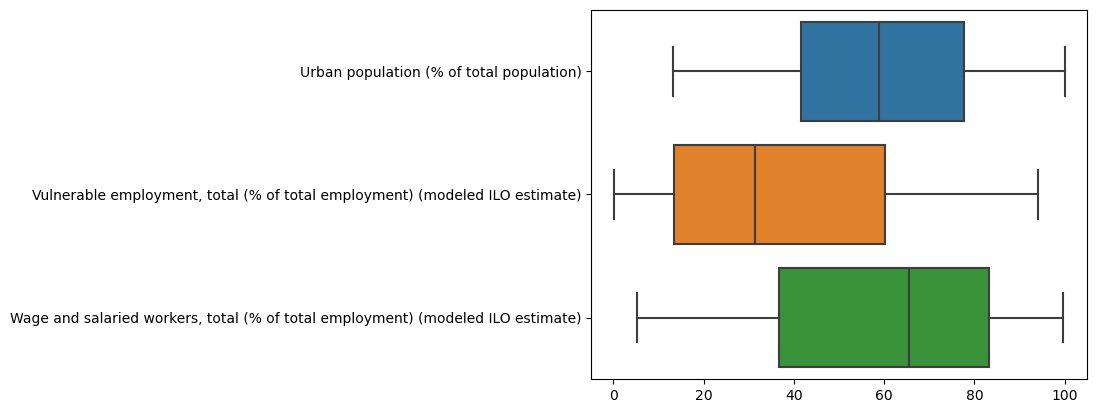

In [168]:
box_ctry = sns.boxplot(data=ctry_df[['Urban population (% of total population)',
       'Vulnerable employment, total (% of total employment) (modeled ILO estimate)',
       'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)']], orient='h')

### View tertiary education enrollment rates:

#### Rates among aggregates

Text(0.5, 1.0, 'Tertiary Education Enrollment Rates (Aggregates, 2019)')

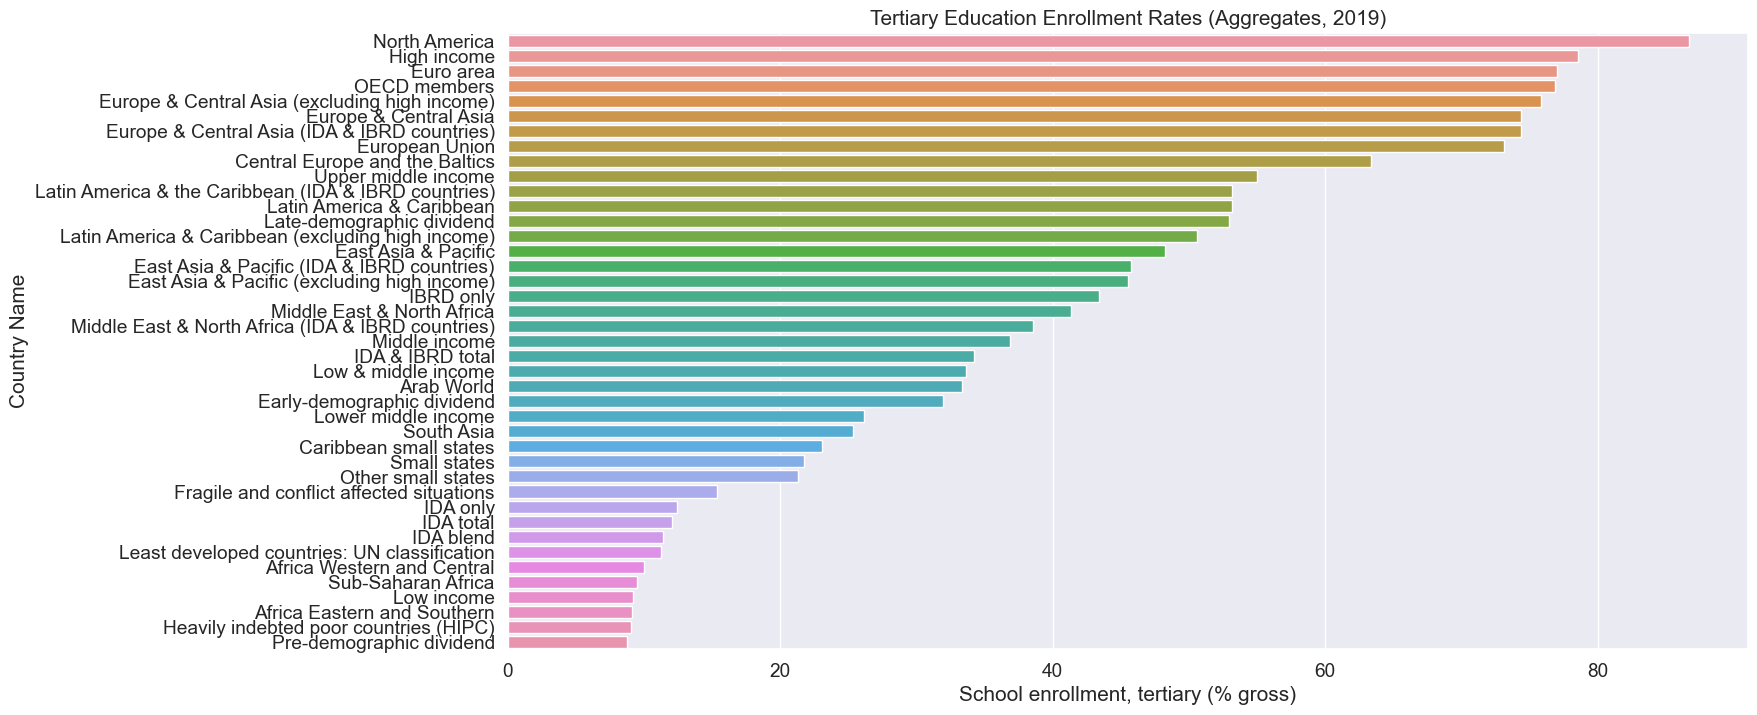

In [169]:
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(16,8))
sns.barplot(x = "School enrollment, tertiary (% gross)", y = "Country Name", data = agg_df, \
            order=agg_df.groupby('Country Name')['School enrollment, tertiary (% gross)'].agg('sum')\
            .sort_values(ascending=False).index).set_title('Tertiary Education Enrollment Rates (Aggregates, 2019)')

Based on this barplot, among the highest recorded tertiary education enrollment rates in 2019 were North America, High income countries, OECD members, and the Euro area. Among the lowest were Low income countries, Heavily indebted poor countries, and Sub-Saharan Africa.

We can take a better look by separating these groups into region, income levels, lenging groups, demographic divident gorups, small states, and other.

#### by region

Text(0.5, 1.0, 'Tertiary Education Enrollment by Region (2019)')

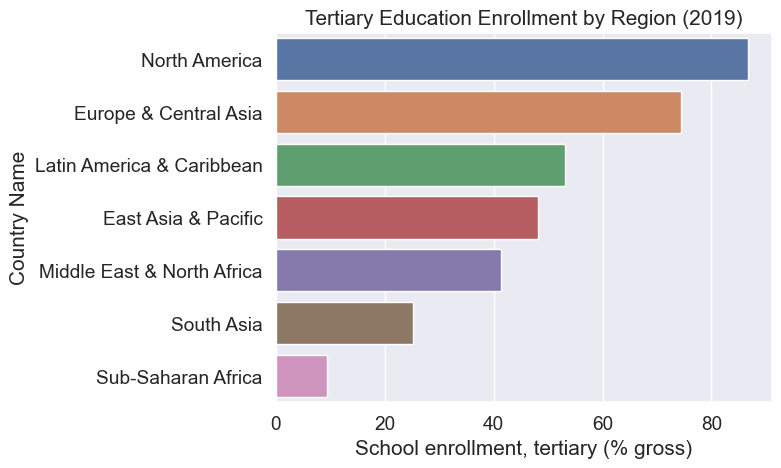

In [170]:
region = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', \
           'North America', 'South Asia', 'Sub-Saharan Africa']
agg_region = agg_df.loc[agg_df['Country Name'].isin(region)]
agg_region = agg_region.sort_values('Country Name').reset_index(drop=True)

sns.barplot(x = 'School enrollment, tertiary (% gross)', y = 'Country Name', \
                 data = agg_region, order=agg_region.groupby('Country Name')\
                ['School enrollment, tertiary (% gross)'].agg('sum').sort_values(ascending=False).index)\
                .set_title('Tertiary Education Enrollment by Region (2019)')

In [171]:
agg_region[['School enrollment, tertiary (% gross)', 'Country Name']]\
.sort_values(by='School enrollment, tertiary (% gross)',ascending=False)

School enrollment, tertiary (% gross)                Country Name
4                                  86.71               North America
1                                  74.36       Europe & Central Asia
2                                  53.13   Latin America & Caribbean
0                                  48.22         East Asia & Pacific
3                                  41.37  Middle East & North Africa
5                                  25.30                  South Asia
6                                   9.45          Sub-Saharan Africa

In the region, North America reported the highest tertiary enrollment rate, 86.71% followed by Europe & Central Asia at 74.36%. Sub-Saharan Africa reported the lowest, 9.45%. Eastern, Southern, Western and Central Africa were not included in this group since they comprise Sub-Saharan Africa.

#### by income level

Text(0.5, 1.0, 'Tertiary Education Enrollment by Income Level (2019)')

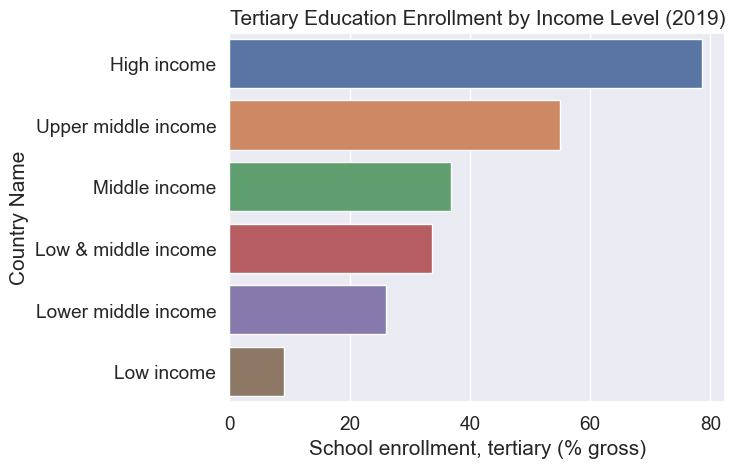

In [172]:
income = ['High income', 'Low & middle income', 'Low income', 'Lower middle income', \
           'Middle income', 'Upper middle income']
agg_income = agg_df.loc[agg_df['Country Name'].isin(income)]
agg_income = agg_income.sort_values('Country Name').reset_index(drop=True)

sns.barplot(x = 'School enrollment, tertiary (% gross)', y = 'Country Name', \
            data = agg_income, order=agg_income.groupby('Country Name')\
            ['School enrollment, tertiary (% gross)'].agg('sum').sort_values(ascending=False).index)\
            .set_title('Tertiary Education Enrollment by Income Level (2019)')

In [173]:
agg_income[['School enrollment, tertiary (% gross)', 'Country Name']]\
.sort_values(by='School enrollment, tertiary (% gross)',ascending=False)

School enrollment, tertiary (% gross)         Country Name
0                                  78.56          High income
5                                  54.97  Upper middle income
4                                  36.82        Middle income
1                                  33.64  Low & middle income
3                                  26.12  Lower middle income
2                                   9.15           Low income

By income level, tertiary enrollment rates appear to "climb" with income level, with the high income reporting a rate of 78.56% versus the low income rate of 9.15%.

#### by lending groups

Text(0.5, 1.0, 'Tertiary Education Enrollment by Lending Group (2019)')

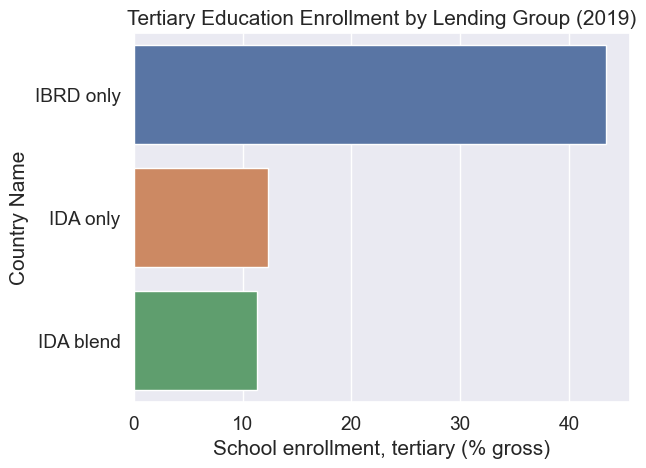

In [174]:
lending = ['IBRD only', 'IDA blend', 'IDA only']
agg_lending = agg_df.loc[agg_df['Country Name'].isin(lending)]
agg_lending = agg_lending.sort_values('Country Name').reset_index(drop=True)

sns.barplot(x = 'School enrollment, tertiary (% gross)', y = 'Country Name', \
            data = agg_lending, order=agg_lending.groupby('Country Name')\
            ['School enrollment, tertiary (% gross)'].agg('sum').sort_values(ascending=False).index)\
            .set_title('Tertiary Education Enrollment by Lending Group (2019)')

In [175]:
agg_lending[['School enrollment, tertiary (% gross)', 'Country Name']]\
.sort_values(by='School enrollment, tertiary (% gross)',ascending=False)

School enrollment, tertiary (% gross) Country Name
0                                  43.39    IBRD only
2                                  12.37     IDA only
1                                  11.36    IDA blend

By lending groups, tertiary enrollment rate is highest in the IBRD group, 43.39%. This group of lenders are middle to low income, while IDA represent the world's poorest countries. IDA blend reported the lowest tertiary enrollment rate among lending groups, 11.36%.

#### by demographic dividend groups

Text(0.5, 1.0, 'Tertiary Education Enrollment by Demographic Dividend Group (2019)')

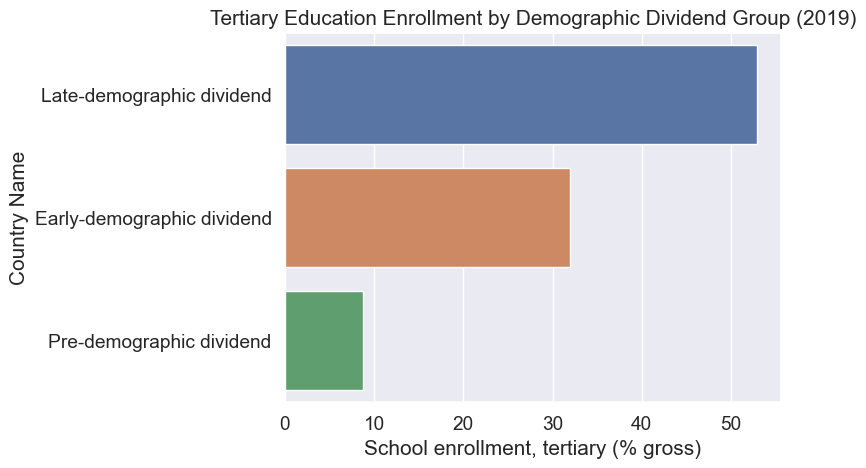

In [176]:
dem_div = ['Early-demographic dividend', 'Late-demographic dividend', 'Pre-demographic dividend']
agg_dem_div = agg_df.loc[agg_df['Country Name'].isin(dem_div)]
agg_dem_div = agg_dem_div.sort_values('Country Name').reset_index(drop=True)

sns.barplot(x = 'School enrollment, tertiary (% gross)', y = 'Country Name', \
            data = agg_dem_div, order=agg_dem_div.groupby('Country Name')\
            ['School enrollment, tertiary (% gross)'].agg('sum').sort_values(ascending=False).index)\
            .set_title('Tertiary Education Enrollment by Demographic Dividend Group (2019)')

In [177]:
agg_dem_div[['School enrollment, tertiary (% gross)', 'Country Name']]\
.sort_values(by='School enrollment, tertiary (% gross)',ascending=False)

School enrollment, tertiary (% gross)                Country Name
1                                  52.95   Late-demographic dividend
0                                  31.97  Early-demographic dividend
2                                   8.74    Pre-demographic dividend

The demographic dividend, as defined by World Bank, describes the way rapid economic growth and population age structure act and react to each other. This is measured over a 20- to 30-year period during which a country's working age population increases compared to the dependent population, resulting in economic growth by way of more investments in human capital, such as education and health.

The observations shown here represent phases of the demographic transition, the first being pre-demographic dividend, followed by early-demographic dividend, and late-demographic dividend. The final phase is post-demographic dividend; however, this observation was dropped due to missing values. Pre-demographic dividend reported the lowest tertiary enrollment rate in this group, 8.74%. At this phase, high fertility rates act in opposition to the proportion of the population at working age, meaning less investments in human capital. Late-demographic dividend reported the highest tertiary enrollment rate, 52.95%. At this phase, the working age population takes a larger share, motivated by reduced fertility and resulting in more investments in human capital.

In [178]:
df_post_dem = df[df['Country Name'] == 'Post-demographic dividend']
df_post_dem['School enrollment, tertiary (% gross)']

256   80.17
Name: School enrollment, tertiary (% gross), dtype: float64

Since we did not drop data from the original dataset, we can quickly check the tertiary enrollment rate for Post-demographic dividend which, at 80.17%, tracks with what we know of these phases.

#### by small states

Text(0.5, 1.0, 'Tertiary Education Enrollment by Small States (2019)')

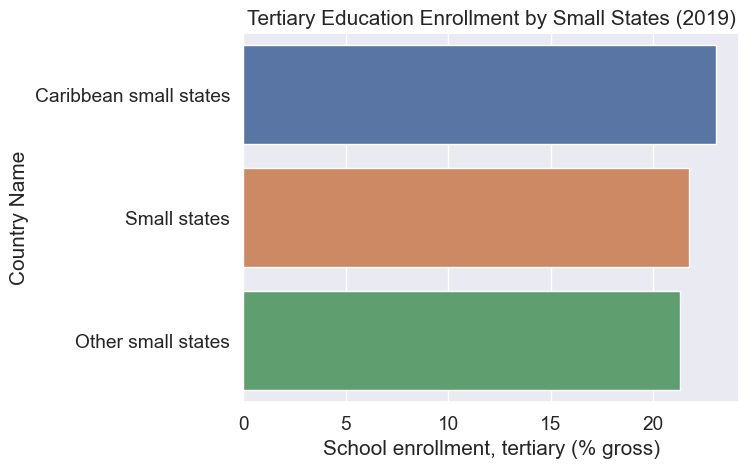

In [179]:
small = ['Caribbean small states', 'Other small states', 'Small states']
agg_small = agg_df.loc[agg_df['Country Name'].isin(small)]
agg_small = agg_small.sort_values('Country Name').reset_index(drop=True)

sns.barplot(x = 'School enrollment, tertiary (% gross)', y = 'Country Name', \
            data = agg_small, order=agg_small.groupby('Country Name')\
            ['School enrollment, tertiary (% gross)'].agg('sum').sort_values(ascending=False).index)\
            .set_title('Tertiary Education Enrollment by Small States (2019)')

In [180]:
agg_small[['School enrollment, tertiary (% gross)', 'Country Name']]\
.sort_values(by='School enrollment, tertiary (% gross)',ascending=False)

School enrollment, tertiary (% gross)            Country Name
0                                  23.03  Caribbean small states
2                                  21.73            Small states
1                                  21.28      Other small states

In [181]:
df_pac_small = df[df['Country Name'] == 'Pacific island small states']
df_pac_small['School enrollment, tertiary (% gross)']

255   22.99
Name: School enrollment, tertiary (% gross), dtype: float64

Small states are countries with populations below 1.5 million. It appears that tertiary enrollment rates are similar across this group. This is not surprising as Caribbean, Other, and Pacific island small states all comprise Small states. Interestingly, the group with the most countries, Pacific, reported the highest tertiary enrollment rate of 22.99%, while the group with the most countries, Other, reported the lowest rate, 21.28%.

Text(0.5, 1.0, 'Tertiary Education Enrollment by Other Country Groups (2019)')

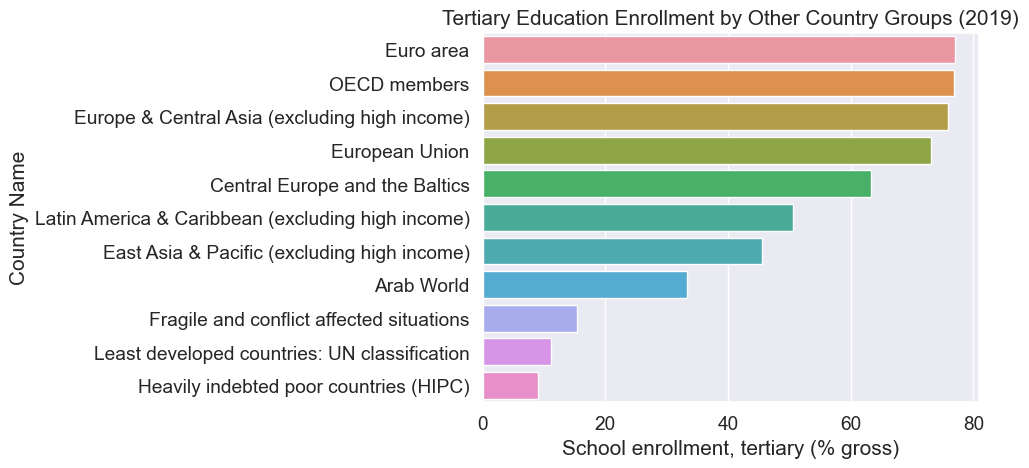

In [182]:
other = ['Arab World', 'Central Europe and the Baltics', 'East Asia & Pacific (excluding high income)', 'Euro area', \
         'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations', \
         'Heavily indebted poor countries (HIPC)', 'Latin America & Caribbean (excluding high income)', \
         'Least developed countries: UN classification', \
         'OECD members']
agg_other = agg_df.loc[agg_df['Country Name'].isin(other)]
agg_other = agg_other.sort_values('Country Name').reset_index(drop=True)

sns.barplot(x = 'School enrollment, tertiary (% gross)', y = 'Country Name', \
            data = agg_other, order=agg_other.groupby('Country Name')\
            ['School enrollment, tertiary (% gross)'].agg('sum').sort_values(ascending=False).index)\
            .set_title('Tertiary Education Enrollment by Other Country Groups (2019)')

In [183]:
agg_other[['School enrollment, tertiary (% gross)', 'Country Name']]\
.sort_values(by='School enrollment, tertiary (% gross)',ascending=False)

School enrollment, tertiary (% gross)  \
3                                   77.02   
10                                  76.90   
4                                   75.84   
5                                   73.15   
1                                   63.35   
8                                   50.57   
2                                   45.51   
0                                   33.31   
6                                   15.36   
9                                   11.20   
7                                    9.02   

                                         Country Name  
3                                           Euro area  
10                                       OECD members  
4       Europe & Central Asia (excluding high income)  
5                                      European Union  
1                      Central Europe and the Baltics  
8   Latin America & Caribbean (excluding high income)  
2         East Asia & Pacific (excluding high income)  
0                                          Arab World  
6            Fragile and conflict affected situations  
9        Least developed countries: UN classification  
7              Heavily indebted poor countries (HIPC)

We can also check tertiary enrollment rates for two other aggregates belonging to this group. These were earlier dropped because of missing data or duplication: 

In [184]:
df_afr_oth = df[(df['Country Name'] == 'Middle East & North Africa (excluding high income)') | \
                  (df['Country Name'] == 'Sub-Saharan Africa (excluding high income)')]
df_afr_oth[['Country Name','School enrollment, tertiary (% gross)']]

Country Name  \
248  Middle East & North Africa (excluding high inc...   
262         Sub-Saharan Africa (excluding high income)   

     School enrollment, tertiary (% gross)  
248                                  38.62  
262                                   9.45

HIPCs reported the lowest tertiary enrollment rate in this group at 9.02% compared to the Euro area with a rate of 77.02%.

#### Rates among countries

Text(0.5, 1.0, 'Tertiary Education Enrollment Rates (Countries, 2019)')

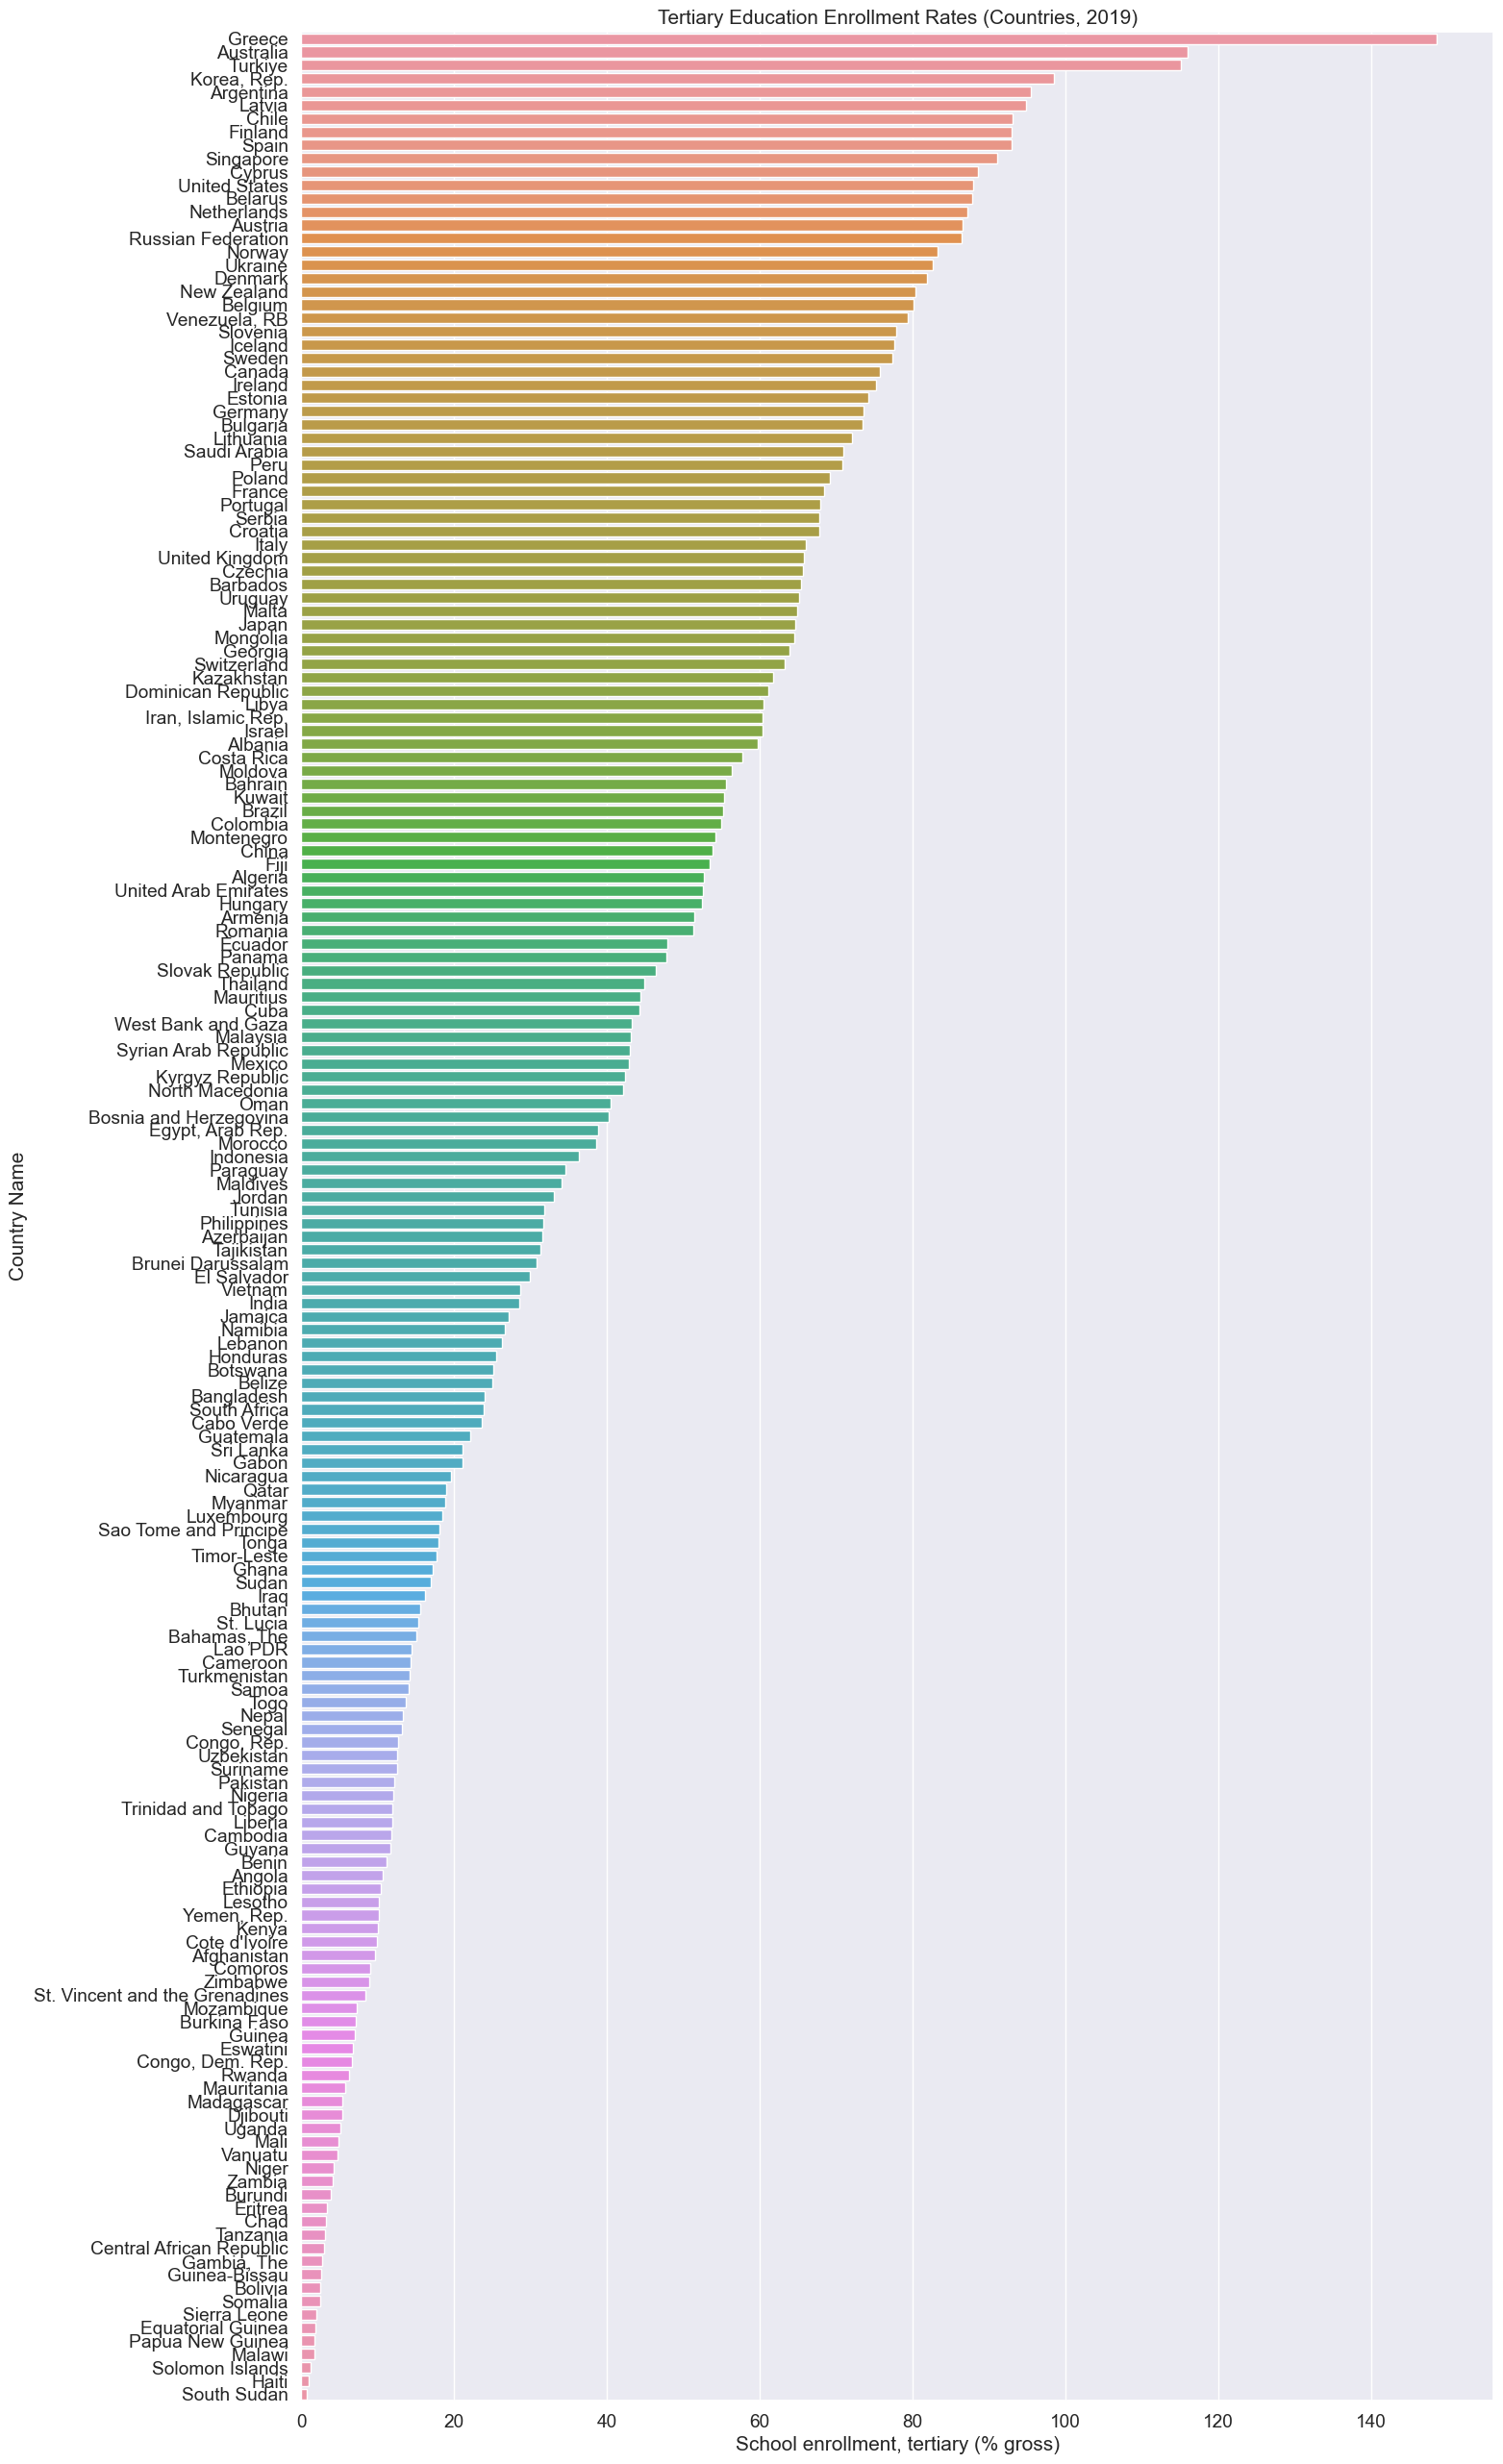

In [185]:
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(16,32))
sns.barplot(x = "School enrollment, tertiary (% gross)", y = "Country Name", data = ctry_df, \
            order=ctry_df.groupby('Country Name')['School enrollment, tertiary (% gross)'].agg('sum')\
            .sort_values(ascending=False).index).set_title('Tertiary Education Enrollment Rates (Countries, 2019)')

Based on this barplot, among the highest recorded tertiary education enrollment rates in 2019 were Greece, Australia, Turkey, South Korea, and Argentina. Looking back at our aggregate data, High income countries listed with the top enrollment rates. Greece, Australia, and South Korea all fall in this category, while Turkey and Australia are classified as Upper-middle income countries.

Among the lowest tertiary education enrollment rates were South Sudan, Haiti, Solomon Islands, Malawi, and Papua New Guinea. Haiti, Solomon Islands, and Papua New Guinea are classified as Lower-middle income while South Sudan and Malawi are classified as Low income countries.

### EDA

#### Aggregates EDA

In [186]:
# pearson correlation matrix for numeric columns
corrmat = agg_df.drop(columns=['Country Name']).corr()

In [187]:
corrmat

Access to clean fuels and technologies for cooking (% of population)  \
Access to clean fuels and technologies for cook...                                               1.00                      
Access to electricity (% of population)                                                          0.95                      
Adolescent fertility rate (births per 1,000 wom...                                              -0.91                      
Age dependency ratio (% of working-age population)                                              -0.88                      
Birth rate, crude (per 1,000 people)                                                            -0.93                      
Compulsory education, duration (years)                                                           0.48                      
Contributing family workers, total (% of total ...                                              -0.94                      
Current health expenditure (% of GDP)                                                            0.63                      
Death rate, crude (per 1,000 people)                                                             0.00                      
Employment in agriculture (% of total employmen...                                              -0.95                      
Employment in industry (% of total employment) ...                                               0.84                      
Employment in services (% of total employment) ...                                               0.86                      
Employment to population ratio, 15+, total (%) ...                                              -0.38                      
Employment to population ratio, ages 15-24, tot...                                              -0.29                      
Fertility rate, total (births per woman)                                                        -0.92                      
GDP (current US$)                                                                                0.45                      
GDP growth (annual %)                                                                           -0.40                      
GDP per capita (current US$)                                                                     0.60                      
GDP per capita growth (annual %)                                                                 0.15                      
Government expenditure on education, total (% o...                                               0.54                      
Immunization, DPT (% of children ages 12-23 mon...                                               0.82                      
Immunization, measles (% of children ages 12-23...                                               0.89                      
Individuals using the Internet (% of population)                                                 0.94                      
Inflation, consumer prices (annual %)                                                           -0.51                      
Labor force participation rate for ages 15-24, ...                                              -0.17                      
Labor force participation rate, total (% of tot...                                              -0.37                      
Labor force, total                                                                               0.04                      
Life expectancy at birth, total (years)                                                          0.94                      
Literacy rate, adult total (% of people ages 15...                                               0.88                      
Mortality rate, infant (per 1,000 live births)                                                  -0.94                      
Out-of-pocket expenditure (% of current health ...                                              -0.66                      
People using at least basic drinking water serv...                                  

Based on this correlation matrix, quite a few features show strong positive correlation to tertiary enrollment (target), including access to utilities, life expectancy, literacy rate, secondary school enrollment, and duration of preprimary school. Features with strong negative correlation to the target include adolescent fertility rate, age dependency ratio, birth rate, and contributing family workers.

We can trim our list of columns by removing those with less correlation to the target compared to other features. These are the following columns:
 - Compulsory education, duration (years)
 - Death rate, crude (per 1,000 people)
 - Employment to population ratio, 15+, total (%) (modeled ILO estimate)
 - Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)
 - GDP (current US$)
 - GDP growth (annual \%)
 - GDP per capita growth (annual \%)
 - Inflation, consumer prices (annual \%)	
 - Labor force participation rate for ages 15-24, total (\%) (modeled ILO estimate)
 - Labor force participation rate, total (\% of total population ages 15+) (modeled ILO estimate)
 - Labor force, total
 - Population density (people per sq. km of land area)
 - Primary education, duration (years)
 - School enrollment, primary (\% gross)
 - Secondary education, duration (years)
 - Unemployment, total (\% of total labor force) (modeled ILO estimate)
 - Unemployment, youth total (\% of total labor force ages 15-24) (modeled ILO estimate)

In [188]:
trim_cols = ['Compulsory education, duration (years)', 'Death rate, crude (per 1,000 people)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)',
       'GDP (current US$)', 'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Inflation, consumer prices (annual %)',
       'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)',
       'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
       'Labor force, total', 'Population density (people per sq. km of land area)',
       'Primary education, duration (years)',
       'School enrollment, primary (% gross)',
       'Secondary education, duration (years)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)']
agg_trimmed = agg_df.drop(trim_cols, axis=1)

In [189]:
agg_trimmed.shape

(41, 37)

<function matplotlib.pyplot.show(close=None, block=None)>

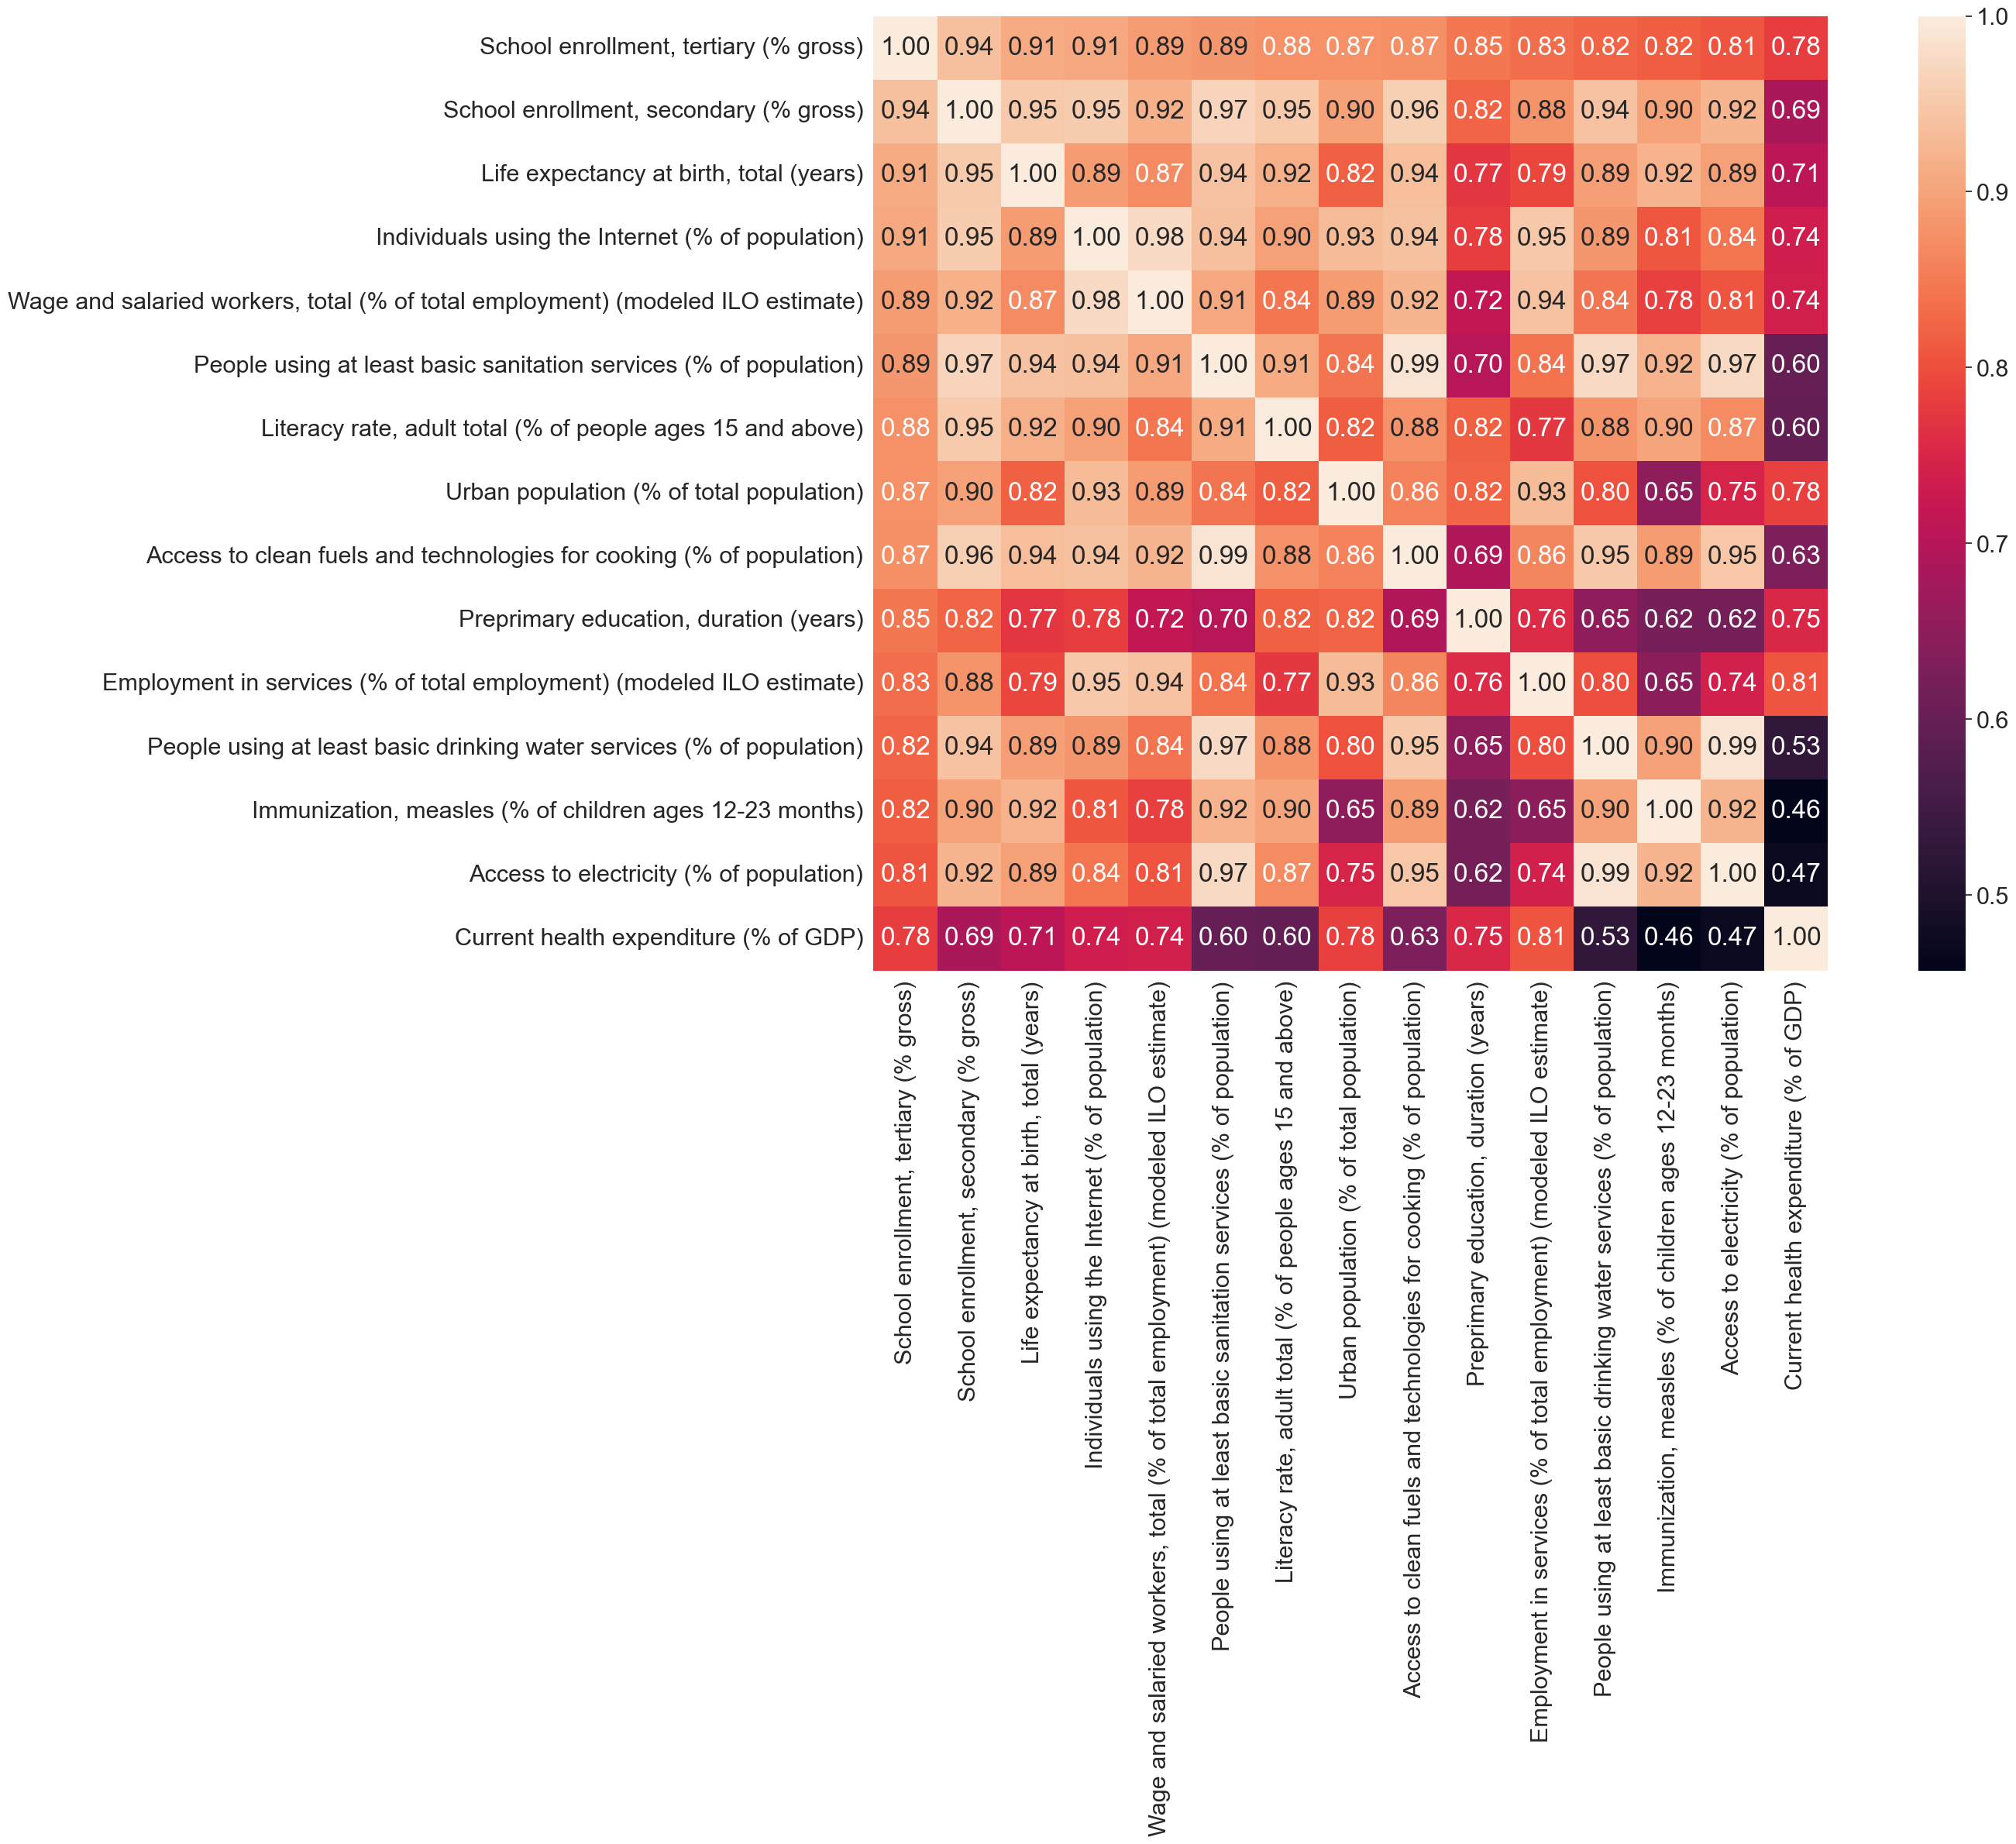

In [190]:
k = 15
cols = corrmat.nlargest(k, 'School enrollment, tertiary (% gross)')['School enrollment, tertiary (% gross)'].index

cm = np.corrcoef(agg_trimmed[cols].values.T)
sns.set(font_scale = 2)
f, ax = plt.subplots(figsize=(30,16))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':24},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show

It looks like, among the features shown, tertiary education enrollment is influenced by many factors, including secondary school enrollment, life expectancy, access to utilities, literacy rate and preprimary education.

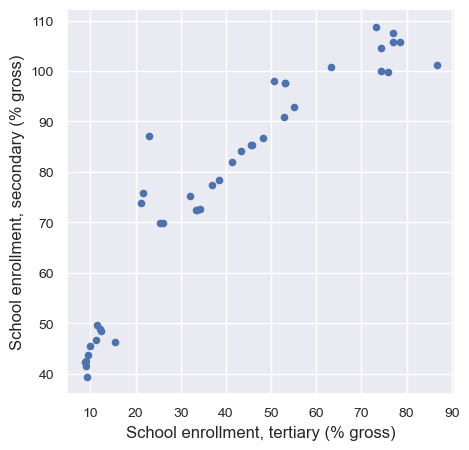

In [191]:
# strongest positive correlation to target
tee_sec = agg_df.plot.scatter(x='School enrollment, tertiary (% gross)', y='School enrollment, secondary (% gross)', figsize=(5,5))
tee_sec.set_xlabel('School enrollment, tertiary (% gross)', fontsize=12)
tee_sec.set_ylabel('School enrollment, secondary (% gross)', fontsize=12)
tee_sec.tick_params(axis="both", labelsize=10)

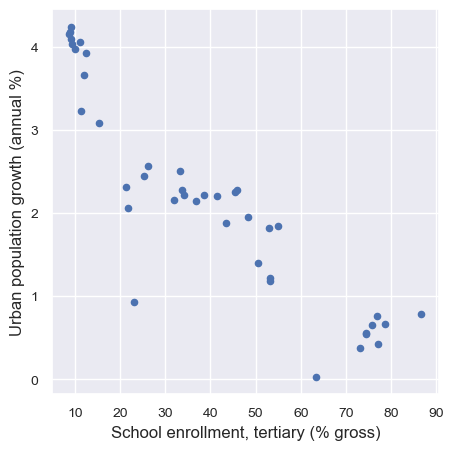

In [192]:
# strongest negative correlation to target
tee_urb = agg_df.plot.scatter(x='School enrollment, tertiary (% gross)', y='Urban population growth (annual %)', figsize=(5,5))
tee_urb.set_xlabel('School enrollment, tertiary (% gross)', fontsize=12)
tee_urb.set_ylabel('Urban population growth (annual %)', fontsize=12)
tee_urb.tick_params(axis="both", labelsize=10)

#### Countries EDA

In [193]:
# pearson correlation matrix for numeric columns
corrmat = ctry_df.drop(columns=['Country Name']).corr()

In [194]:
corrmat

Access to clean fuels and technologies for cooking (% of population)  \
Access to clean fuels and technologies for cook...                                               1.00                      
Access to electricity (% of population)                                                          0.83                      
Adolescent fertility rate (births per 1,000 wom...                                              -0.75                      
Age dependency ratio (% of working-age population)                                              -0.76                      
Birth rate, crude (per 1,000 people)                                                            -0.82                      
Compulsory education, duration (years)                                                           0.47                      
Contributing family workers, total (% of total ...                                              -0.68                      
Current health expenditure (% of GDP)                                                            0.40                      
Death rate, crude (per 1,000 people)                                                            -0.03                      
Employment in agriculture (% of total employmen...                                              -0.81                      
Employment in industry (% of total employment) ...                                               0.59                      
Employment in services (% of total employment) ...                                               0.71                      
Employment to population ratio, 15+, total (%) ...                                              -0.14                      
Employment to population ratio, ages 15-24, tot...                                              -0.15                      
Fertility rate, total (births per woman)                                                        -0.81                      
GDP (current US$)                                                                                0.15                      
GDP growth (annual %)                                                                           -0.25                      
GDP per capita (current US$)                                                                     0.52                      
GDP per capita growth (annual %)                                                                -0.12                      
Government expenditure on education, total (% o...                                               0.22                      
Immunization, DPT (% of children ages 12-23 mon...                                               0.48                      
Immunization, measles (% of children ages 12-23...                                               0.54                      
Individuals using the Internet (% of population)                                                 0.85                      
Inflation, consumer prices (annual %)                                                            0.06                      
Labor force participation rate for ages 15-24, ...                                              -0.08                      
Labor force participation rate, total (% of tot...                                              -0.13                      
Labor force, total                                                                               0.03                      
Life expectancy at birth, total (years)                                                          0.82                      
Literacy rate, adult total (% of people ages 15...                                               0.76                      
Mortality rate, infant (per 1,000 live births)                                                  -0.81                      
Out-of-pocket expenditure (% of current health ...                                              -0.26                      
People using at least basic drinking water serv...                                  

Based on this correlation matrix, not many features show very strong positive correlation to tertiary enrollment (target). Among the positive are access to utilities including internet, life expectancy, literacy rate, secondary school enrollment, and proportion of wage and salaried workers. Most of these correlations are similar to those noted for aggregates, though for individual countries the strength is lower. Features with strong negative correlation to the target include adolescent fertility, birth, fertility and mortality rates, and proportion of vulnerable employment.

We can trim our list of columns by removing those with less correlation to the target compared to other features. These are the following columns:
 - Age dependency ratio (% of working-age population)
 - Compulsory education, duration (years)
 - Contributing family workers, total (% of total employment) (modeled ILO estimate)
 - Current health expenditure (% of GDP)
 - Death rate, crude (per 1,000 people)
 - Employment in industry (% of total employment) (modeled ILO estimate)
 - Employment to population ratio, 15+, total (%) (modeled ILO estimate)
 - Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)
 - GDP (current US$)$
 - GDP growth (annual \%)
 - GDP per capita (current US$)
 - GDP per capita growth (annual \%)
 - Government expenditure on education, total (% of GDP)
 - Immunization, DPT (% of children ages 12-23 months)	
 - Immunization, measles (% of children ages 12-23 months)	
 - Inflation, consumer prices (annual \%)	
 - Labor force participation rate for ages 15-24, total (\%) (modeled ILO estimate)
 - Labor force participation rate, total (\% of total population ages 15+) (modeled ILO estimate)
 - Labor force, total
 - Out-of-pocket expenditure (% of current health expenditure)
 - Political Stability and Absence of Violence/Terrorism: Estimate
 - Population density (people per sq. km of land area)
 - Population growth (annual %)
 - Preprimary education, duration (years)
 - Primary education, duration (years)
 - School enrollment, primary (\% gross)
 - Secondary education, duration (years)
 - Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)
 - Unemployment, total (\% of total labor force) (modeled ILO estimate)
 - Unemployment, youth total (\% of total labor force ages 15-24) (modeled ILO estimate)
 - Voice and Accountability: Estimate

In [195]:
trim_cols_ = ['Age dependency ratio (% of working-age population)', 'Compulsory education, duration (years)', \
             'Contributing family workers, total (% of total employment) (modeled ILO estimate)', \
             'Current health expenditure (% of GDP)', 'Death rate, crude (per 1,000 people)', \
             'Employment in industry (% of total employment) (modeled ILO estimate)', \
             'Employment to population ratio, 15+, total (%) (modeled ILO estimate)', \
             'Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)', \
             'GDP (current US$)', 'GDP growth (annual %)', 'GDP per capita (current US$)', 'GDP per capita growth (annual %)', \
             'Government expenditure on education, total (% of GDP)', 'Immunization, DPT (% of children ages 12-23 months)', \
             'Immunization, measles (% of children ages 12-23 months)', 'Inflation, consumer prices (annual %)', \
             'Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)', \
             'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)', \
             'Labor force, total', 'Out-of-pocket expenditure (% of current health expenditure)', \
             'Political Stability and Absence of Violence/Terrorism: Estimate', \
             'Population density (people per sq. km of land area)', 'Population growth (annual %)', \
             'Preprimary education, duration (years)', 'Primary education, duration (years)', \
             'School enrollment, primary (% gross)', 'Secondary education, duration (years)', \
             'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', \
             'Unemployment, total (% of total labor force) (modeled ILO estimate)', \
             'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)', \
             'Voice and Accountability: Estimate']
ctry_trimmed = ctry_df.drop(trim_cols_, axis=1)

In [196]:
ctry_trimmed.shape

(178, 26)

<function matplotlib.pyplot.show(close=None, block=None)>

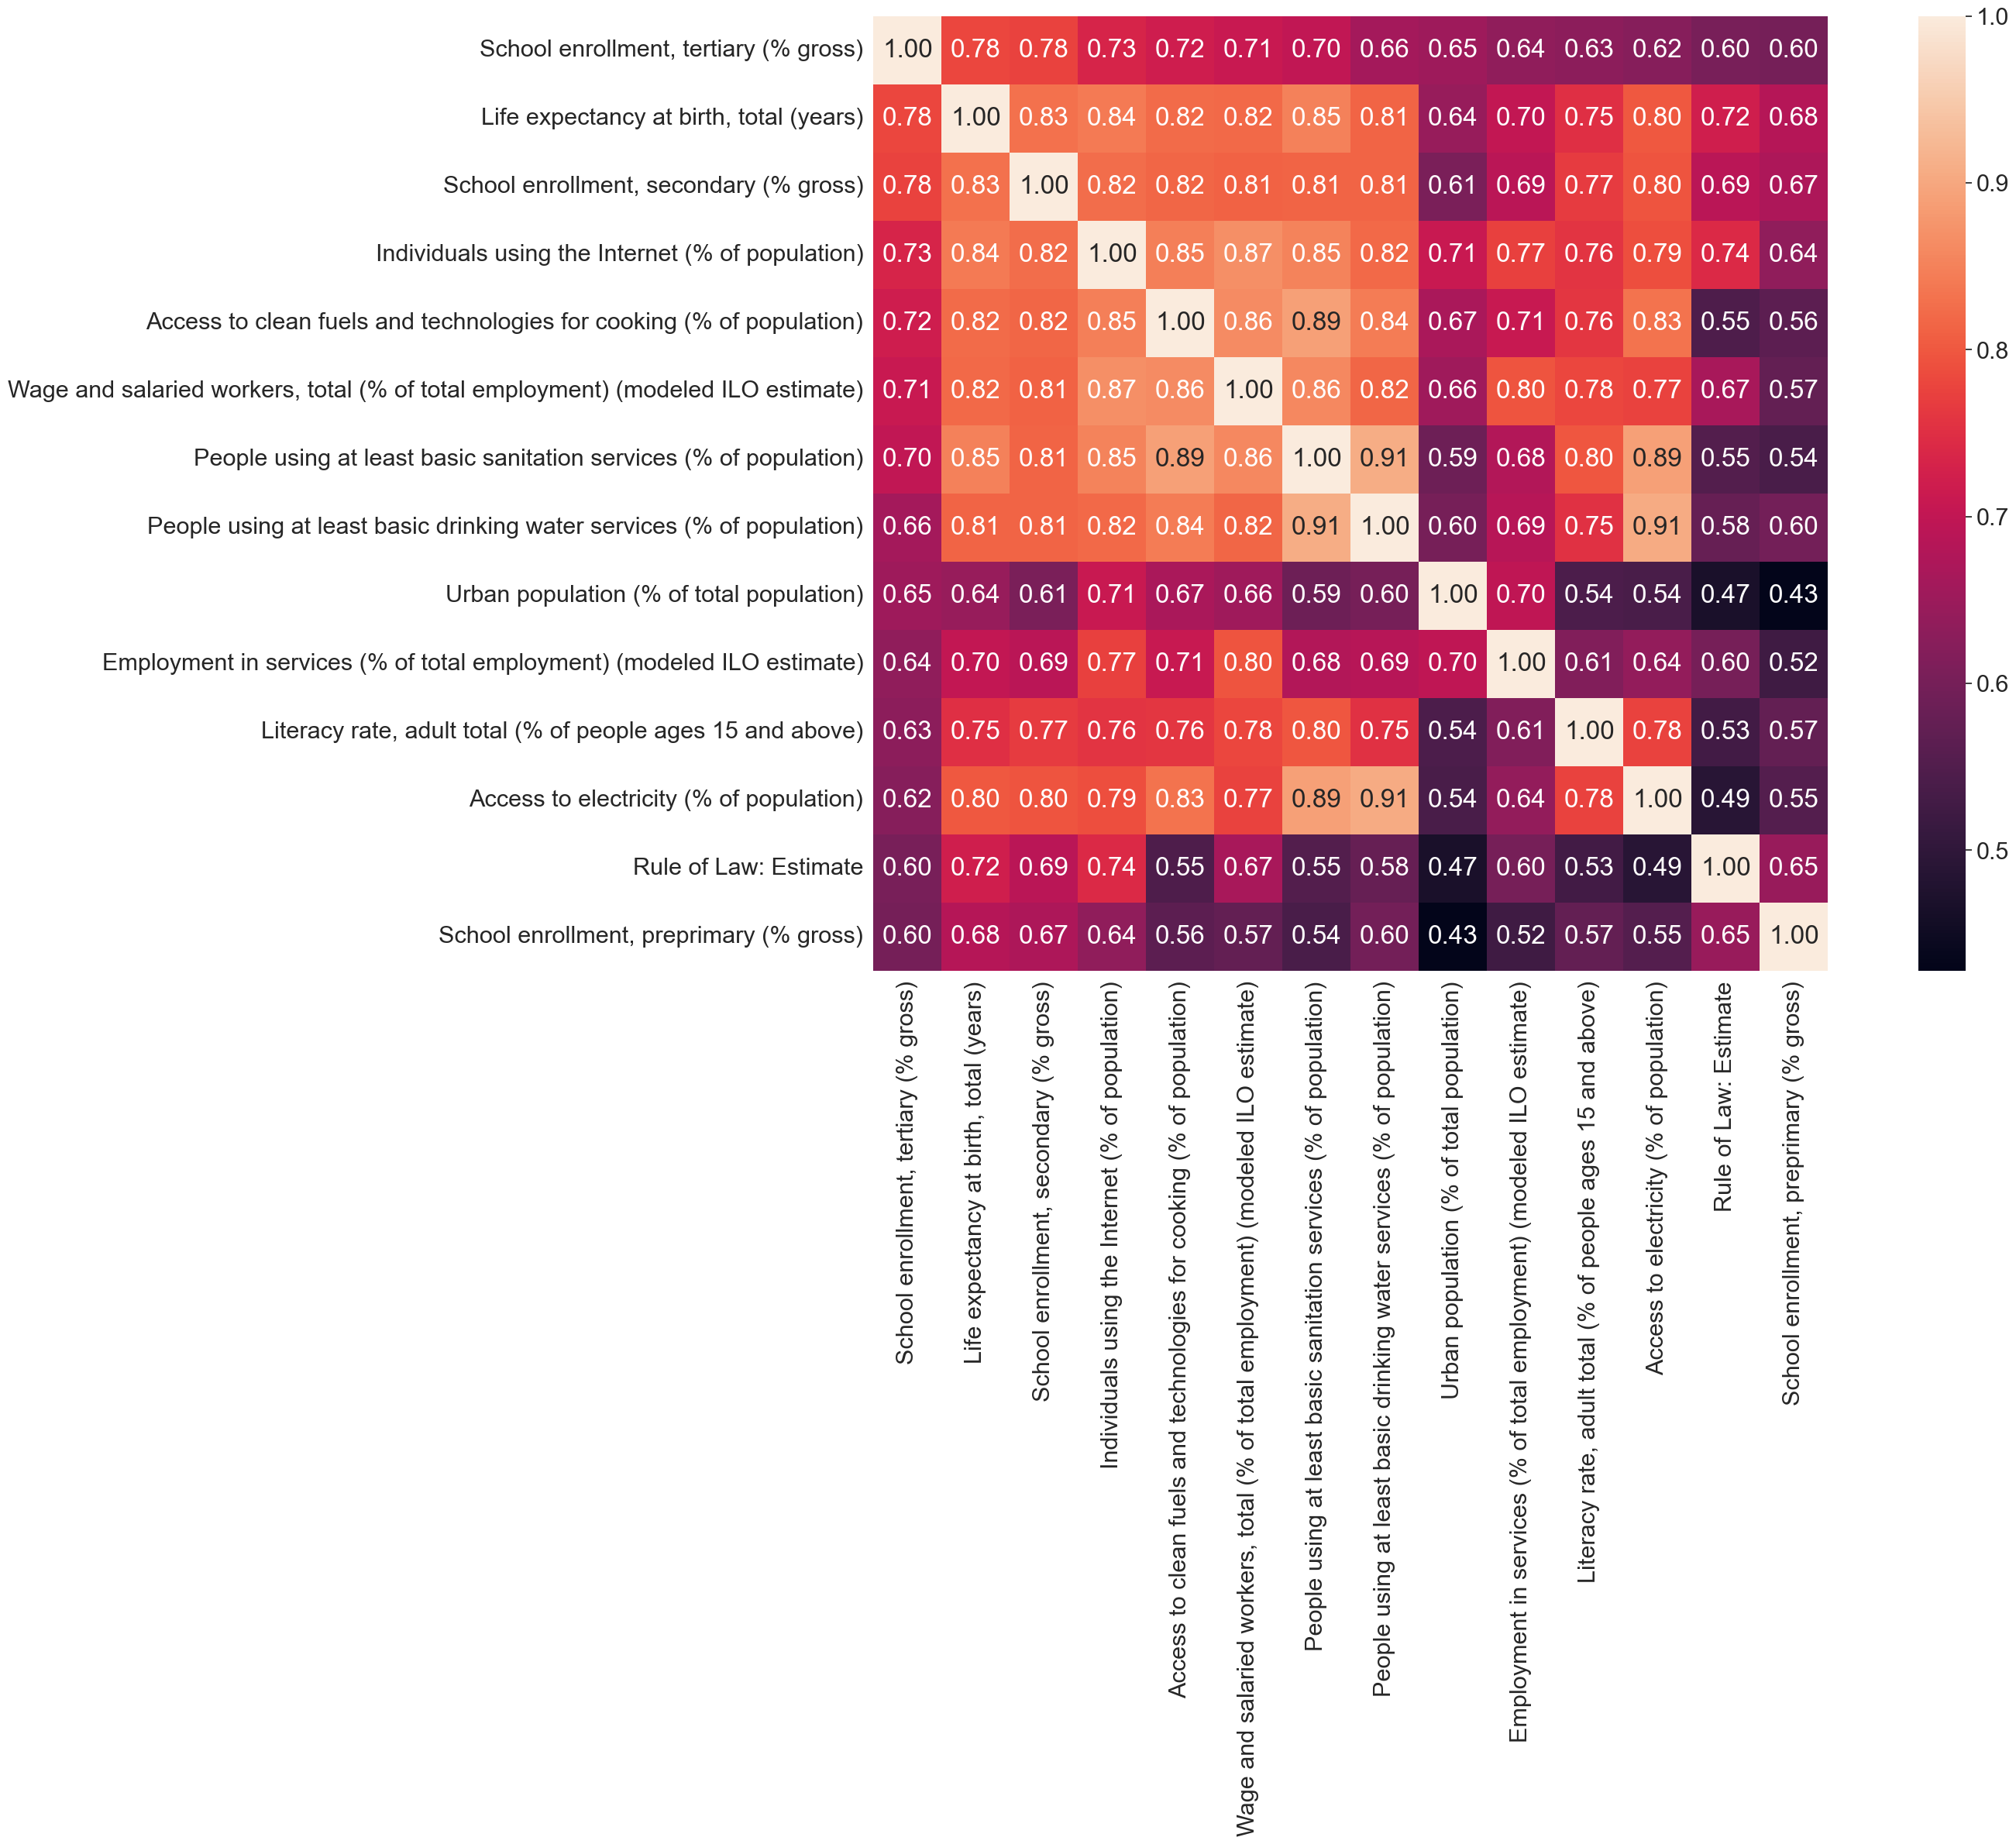

In [197]:
k = 14
cols = corrmat.nlargest(k, 'School enrollment, tertiary (% gross)')['School enrollment, tertiary (% gross)'].index

cm = np.corrcoef(ctry_trimmed[cols].values.T)
sns.set(font_scale = 2)
f, ax = plt.subplots(figsize=(30,16))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':24},\
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show

It looks like, among the features shown, tertiary education enrollment is influenced by many factors, including secondary school enrollment, life expectancy, access to utilities, literacy rate and preprimary education.

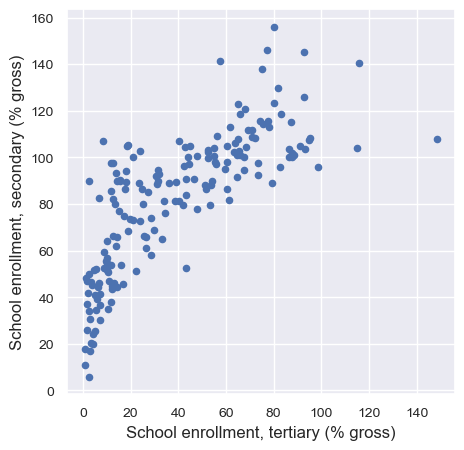

In [198]:
# strongest positive correlation to target
tee_sec_ = ctry_df.plot.scatter(x='School enrollment, tertiary (% gross)', y='School enrollment, secondary (% gross)', figsize=(5,5))
tee_sec_.set_xlabel('School enrollment, tertiary (% gross)', fontsize=12)
tee_sec_.set_ylabel('School enrollment, secondary (% gross)', fontsize=12)
tee_sec_.tick_params(axis="both", labelsize=10)

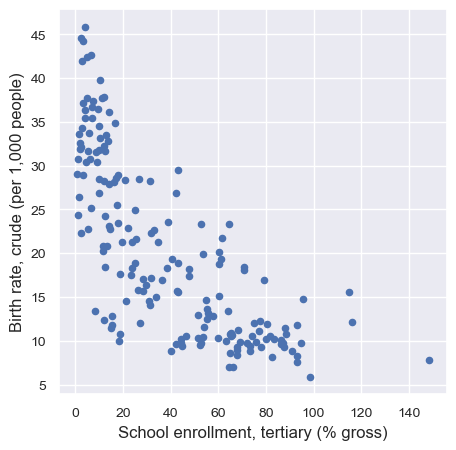

In [199]:
# strongest negative correlation to target
tee_bir_ = ctry_df.plot.scatter(x='School enrollment, tertiary (% gross)', y='Birth rate, crude (per 1,000 people)', figsize=(5,5))
tee_bir_.set_xlabel('School enrollment, tertiary (% gross)', fontsize=12)
tee_bir_.set_ylabel('Birth rate, crude (per 1,000 people)', fontsize=12)
tee_bir_.tick_params(axis="both", labelsize=10)

During cleaning and preparation, we handled missing values and outliers, and dropped columns that appeared to have very least influence on tertiary education enrollment. We can now save our cleaned files for continued analysis and modeling.

In [200]:
agg_trimmed.to_csv('wdi_agg_clean.csv', encoding='utf-8', index=False)

In [201]:
ctry_trimmed.to_csv('wdi_ctry_clean.csv', encoding='utf-8', index=False)